In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import asyncio
import datetime
from concurrent.futures import ThreadPoolExecutor
import time
import nest_asyncio
import random
from nltk import word_tokenize
import re
import numpy as np
from anytree import Node, RenderTree
import itertools
from skimage.transform import hough_circle,hough_circle_peaks
from skimage.draw import circle_perimeter
from skimage.feature import canny
from skimage import color
import cv2
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.util import img_as_ubyte
import json
import glob, os
import codecs
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from string import Template
from nltk import word_tokenize
from functools import reduce
from collections import defaultdict
import numpy as np

In [24]:
print('find the methods in a class')
class ClassWithMethods:
    #def __init__(self):
        
    def method1(self):
        print('method1')
    def method2(self):
        print('method2')
        
obj=ClassWithMethods()

obj.method1()

for method_name in dir(obj):
    try:
        if callable(getattr(object, method_name)):
            print(method_name)
    except:
        method_name=""

import inspect
method_names = [attr for attr in dir(obj) if inspect.ismethod(getattr(obj,attr))]        
print(method_names)

print([inspect.getmembers(obj, predicate=inspect.ismethod)])
        
    

find the methods in a class
method1
__class__
__delattr__
__dir__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
['method1', 'method2']
[[('method1', <bound method ClassWithMethods.method1 of <__main__.ClassWithMethods object at 0x00000205C04D62B0>>), ('method2', <bound method ClassWithMethods.method2 of <__main__.ClassWithMethods object at 0x00000205C04D62B0>>)]]


In [3]:
print('create the equivalent of tsql accept in pandas')

txt1="""Date,Fruit,Num,Color 
2013-11-24,Banana,22.1,Yellow
2013-11-24,Orange,8.6,Orange
2013-11-24,Apple,7.6,Green
2013-11-24,Celery,10.2,Green"""

txt2="""Date,Fruit,Num,Color 
2013-11-24,Banana,22.1,Yellow
2013-11-24,Orange,8.6,Orange
2013-11-24,Apple,7.6,Green
2013-11-24,Celery,10.2,Green
2013-11-25,Apple,22.1,Red
2013-11-25,Orange,8.6,Orange"""

from io import StringIO
f = StringIO(txt1)
df1 = pd.read_table(f,sep =',')
df1.set_index('Date',inplace=True)
print(df1)

f = StringIO(txt2)
df2 = pd.read_table(f,sep =',')
df2.set_index('Date',inplace=True)
print(df2)

df3 =pd.merge(df2, df1, left_index=True, right_index=True,  how='outer', indicator=True
             ,suffixes=("", "_left")
             ).query("_merge=='left_only'")
remove_columns=[item for item in df3.columns if '_left' in item]
remove_columns.append('_merge')
df3=df3.drop(columns=remove_columns)
print(df3)


create the equivalent of tsql accept in pandas
             Fruit   Num  Color 
Date                            
2013-11-24  Banana  22.1  Yellow
2013-11-24  Orange   8.6  Orange
2013-11-24   Apple   7.6   Green
2013-11-24  Celery  10.2   Green
             Fruit   Num  Color 
Date                            
2013-11-24  Banana  22.1  Yellow
2013-11-24  Orange   8.6  Orange
2013-11-24   Apple   7.6   Green
2013-11-24  Celery  10.2   Green
2013-11-25   Apple  22.1     Red
2013-11-25  Orange   8.6  Orange
             Fruit   Num  Color 
Date                            
2013-11-25   Apple  22.1     Red
2013-11-25  Orange   8.6  Orange


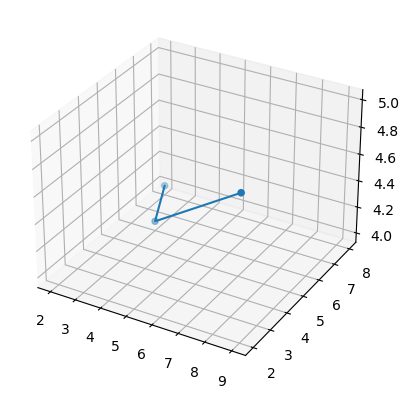

In [4]:
data = [(9, 3, 2), (2, 6, 8), (5, 4, 4)]

ax = plt.subplot(111, projection='3d')
total_point=len(data)
ax.plot(data[0][:total_point],data[1][:total_point],data[2][:total_point])
ax.scatter(data[0][:total_point],data[1][:total_point],data[2][:total_point])
plt.show()

In [5]:
print('run to async functions with awaits for non-blocking processes')

async def func1(**kwargs):
    result=0
    parameters={}
    for key, value in kwargs.items():
        #print(key+":"+str(value))
        parameters[key]=value
    for i in range(parameters['parm1'],parameters['parm2']):
        result+=i
        await asyncio.sleep(0.02)
        print("func1",result)
    return result
async def func2(number, exponent):
    result=pow(number, exponent)
    for i in range(100):
        num1=pow(number+1,exponent)
        result+=num1
        print("func2",result)
        await asyncio.sleep(0.04)
    return result

          
dictParms={'parm1':200,'parm2':300}

async def main():
    await asyncio.gather(
            asyncio.create_task(func1(**dictParms)),
            asyncio.create_task(func2(2,4)),
    )

await main()
        
#if __name__ == "__main__":
#asyncio.run(main())

run to async functions with awaits for non-blocking processes
func2 97
func1 200
func2 178
func1 401
func1 603
func2 259
func1 806
func1 1010
func2 340
func1 1215
func2 421
func1 1421
func1 1628
func2 502
func1 1836
func1 2045
func2 583
func1 2255
func1 2466
func2 664
func1 2678
func1 2891
func2 745
func1 3105
func2 826
func1 3320
func1 3536
func2 907
func1 3753
func1 3971
func2 988
func1 4190
func1 4410
func2 1069
func1 4631
func2 1150
func1 4853
func1 5076
func2 1231
func1 5300
func2 1312
func1 5525
func1 5751
func2 1393
func1 5978
func1 6206
func2 1474
func1 6435
func2 1555
func1 6665
func2 1636
func1 6896
func1 7128
func2 1717
func1 7361
func1 7595
func2 1798
func1 7830
func1 8066
func2 1879
func1 8303
func1 8541
func2 1960
func1 8780
func1 9020
func2 2041
func1 9261
func2 2122
func1 9503
func1 9746
func2 2203
func1 9990
func1 10235
func2 2284
func1 10481
func1 10728
func2 2365
func1 10976
func1 11225
func2 2446
func1 11475
func1 11726
func2 2527
func1 11978
func1 12231
func2 2608


In [6]:
print('retrieve on alpha numeric words')
sentence ="1 I have bought several of the Vitality canned dog food products and have found them all to be of good quality. huh? The product looks more like a stew than a processed meat and it smells better-looks better. My Labrador is finicky-pampered and she appreciates this product better than most."
sentence=sentence.lower()
words=re.split("[, |-|\?|\!|\.]",sentence)
words=filter(lambda w: ((w.isdigit() or w.isalpha()) and len(w)>0),words)
print(*words)

retrieve on alpha numeric words
1 i have bought several of the vitality canned dog food products and have found them all to be of good quality huh the product looks more like a stew than a processed meat and it smells better my labrador is and she appreciates this product better than most


In [7]:
print("find the max index for each sub list")
a = np.matrix([[1, 2, 3, 4, 5], [99, 7, 8, 9, 10], [99, 12, 13, 99, 15], 
               [16, 99, 18, 19, 20], [99, 22, 23, 24, 99]])

n=len(a)
out = np.full((n), np.nan)
for i in range(n):
    col=a[:,i]
    #argmax finds the max first occurrence, so reverse the col
    col=col[::-1]
    print(col)
    index = len(col) - np.argmax(col) - 1
    #index=np.argmax(col)
    val=a[index,i]
    #print(val)
    print(index)
    out[i] = index
    
print(out)
m, n = a.shape   
#print(m,n)
for i in range(n):
    # first find max value and then the indexes of that value
    #print(a[:, i],np.amax(a[:, i]))
    z = np.argwhere(a[:, i] == np.amax(a[:, i]))
    w, _ = z.shape
    # extract the position of last max value
    out[i] = z[w - 1, 0]
    
print(out)    

find the max index for each sub list
[[99]
 [16]
 [99]
 [99]
 [ 1]]
4
[[22]
 [99]
 [12]
 [ 7]
 [ 2]]
3
[[23]
 [18]
 [13]
 [ 8]
 [ 3]]
4
[[24]
 [19]
 [99]
 [ 9]
 [ 4]]
2
[[99]
 [20]
 [15]
 [10]
 [ 5]]
4
[4. 3. 4. 2. 4.]
[4. 3. 4. 2. 4.]


In [8]:
cols = {'animals':['dog','cat','fish'],
        'colors':['red','black','blue','green']}

keys=cols.keys()
values=cols.values()
print(values)

data=[]
for key,values in cols.items():
    print(key,values)
    results=itertools.product([key],values)
    for key,item in enumerate(results):
        data.append(item)

print(data)    
df=pd.DataFrame(data,columns=['category','value'])
print(df)

dict_values([['dog', 'cat', 'fish'], ['red', 'black', 'blue', 'green']])
animals ['dog', 'cat', 'fish']
colors ['red', 'black', 'blue', 'green']
[('animals', 'dog'), ('animals', 'cat'), ('animals', 'fish'), ('colors', 'red'), ('colors', 'black'), ('colors', 'blue'), ('colors', 'green')]
  category  value
0  animals    dog
1  animals    cat
2  animals   fish
3   colors    red
4   colors  black
5   colors   blue
6   colors  green


In [9]:
print('How to read the source contents of a juypter note file')



def readJupyterNotesFnc(path):
    pySource=""
    count=0
    path=os.path.expanduser(path)
    for filename in [item for item in os.listdir(path) if item.endswith(".ipynb")  ]:
        if os.access(path + "\\" + filename, os.R_OK):
            with open(path + "\\" + filename,"r", encoding="utf8") as f:
                source = f.read()
                y = json.loads(source)
                #print(y)
                doc=[]
                found=False
                for x in y['cells']:
                    for line in x['source']:
                    #print(line)
                        if "def " in line:
                            doc.append(line)
                            found=True
                if found==True:
                    print("{}\n".format(filename))
                    for item in doc:
                        print("\t{}".format(item))
                count+=1

path= 'C:\\Users\\dnishimoto.BOISE'               
readJupyterNotesFnc(path)                

How to read the source contents of a juypter note file
1. StackOverflow Q&A.ipynb

	def convert(seconds): 

	def get_sec(h,m,s):

	def lookup(columnString):

	def sum_fractions(fractionList):

	def walk_the_tree(inputDict,parent_index=None):

	def lookup(itemParam):

2. StackOverflow Q&A.ipynb

	def GetRandomChoice():

	def nearest(items, pivot):

	def prepdf(df, cat):

	def get_example_df(notbefore=None):

	def merge(list1, list2): 

2020 Stack Overflow survey.ipynb

	def func(pct, allvalues): 

3. Stackoverflow.ipynb

	def data_range(series):

	def column_difference(gr):

	#def zscore(series):

	def get_value(matrix, row_list, col_list):

4. Stackoverflow.ipynb

	def MonthToNum(val):

	def IsNumeric(value):

	def get_pvalue ( con_conv, test_conv, con_size, test_size):

	def get_power(n, p1, p2, cl):

5. Stackoverflow.ipynb

	def walkTheTree(alist):

6. Stack Overflow.ipynb

	def h(X):

	def g(x):

	def annot_max(x,y, ax=None):

	def getValue(number_pool):

7. Stackoverflow.ipynb

	de

	def drawPieChart(label,data,title):

LSTM alice in wonderland generative text.ipynb

	def generate_text(pattern, n):

LSTM Hungarian Chickpox.ipynb

	def create_dataset2(X, y, time_steps=1):

LSTM Keras Text Psychotherapist.ipynb

	# def clean(texts,src):

	def decode_sequence(input_seq):

	def response(input_text):

LSTM Netflix.ipynb

	def generate_csv(symbol,filename):

	def create_pig_table(basetable, target, variable):

	def create_dataset(dataset, look_back=3):

LSTM passenger 3 day back prediction.ipynb

	def create_dataset(dataset, look_back=3):

LSTM Predict demand of bike share.ipynb

	def create_dataset(dataset, look_back=3):

	def create_dataset2(X, y, time_steps=1):

LSTM Timeseries counts.ipynb

	def split_sequences(sequences, n_steps_in, n_steps_out):

Machine Translation.ipynb

	def words2onehot(word_list, word2index):

	def encoder(onehot):

	def decoder(context_vector):

	def onehot2words(onehot,index2word):

	def sents2seqs(input_type, sentences, tokenizer,sentence_

In [10]:
data=[(-9.83334315,-5.92063135,-7.83228037,5.55314146), (-5.53137301,-8.31010785,-3.28062536,-6.86067081),
(-11.49239039,-1.68053601,-4.14773043,-3.54143976), (-22.25802006,-10.12843806,-2.9688831,-2.70574665), (-20.3418791,-9.4157625,-3.348587,-7.65474665)]

df=pd.DataFrame(data, columns=['A','B','C','D'])
print(df)

           A          B         C         D
0  -9.833343  -5.920631 -7.832280  5.553141
1  -5.531373  -8.310108 -3.280625 -6.860671
2 -11.492390  -1.680536 -4.147730 -3.541440
3 -22.258020 -10.128438 -2.968883 -2.705747
4 -20.341879  -9.415762 -3.348587 -7.654747


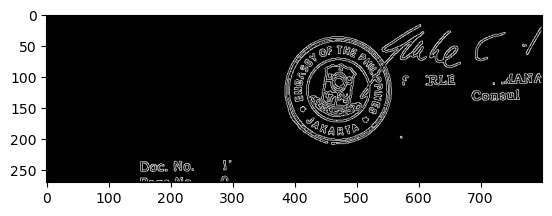

<ipython-input-11-5cc06088d485>:28: FutureWarning: Pass-through of possibly RGB images in gray2rgb is deprecated. In version 0.19, input arrays will always be considered grayscale, even if the last dimension has length 3 or 4. To prevent this warning and ensure compatibility with future versions, detect RGB images outside of this function.
  t_image = color.gray2rgb(image_slice)


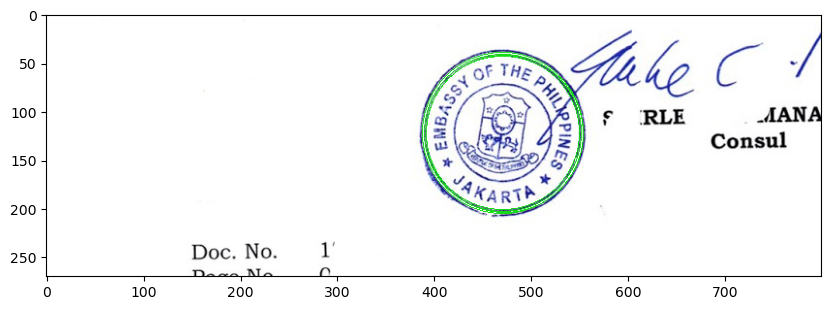

In [11]:
#https://scikit-image.org/docs/dev/auto_examples/edges/plot_circular_elliptical_hough_transform.html
image1=plt.imread('embassy.jpg')
#plt.imshow(image1)
#plt.show()

#slice a section fo the image
image_slice = img_as_ubyte(image1[960:1230, 70:870])

#find the edges
grayscale_image=rgb2gray(image_slice)
canny_edges = canny(grayscale_image, sigma=1.0)

plt.imshow(canny_edges,cmap='gray')
plt.show()


#plt.imshow(canny_edges, cmap='gray')
#plt.show()

hough_radii = np.arange(65, 90, 2)
hough_res = hough_circle(canny_edges, hough_radii)

accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=4)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))

t_image = color.gray2rgb(image_slice)

for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=t_image.shape)
    #print(circy,circx)
    t_image[circy, circx] = (20, 220, 20)

ax.imshow(t_image, cmap='gray')
plt.show()

#try_radii = np.arange(5, 50)
#res = hough_circle(grayscale_image, try_radii)

#ridx, r, c = np.unravel_index(np.argmax(res), res.shape)
#gray_image=cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

#output=image1.copy()
#circles = cv2.HoughCircles(gray_image, cv2.HOUGH_GRADIENT, 1.3, 100, param1=80, param2=140, minRadius=30, maxRadius=100)
#if circles is not None:


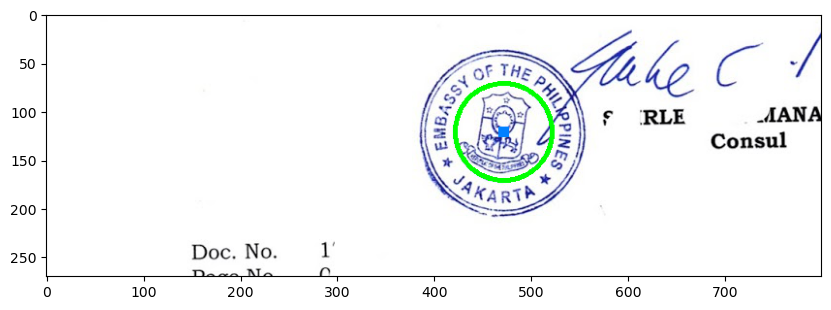

In [12]:

def detect_circles_with_hough_lines(image):
    """
    :param image: the image to detect circles
    :return: the image with the circles drawn on it
    """
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # detect circles in the image
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 100)
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(image, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    # return the output image
    return image

image1=plt.imread('embassy.jpg')
image_slice = img_as_ubyte(image1[960:1230, 70:870])
image=detect_circles_with_hough_lines(image_slice)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
ax.imshow(image)
plt.show()

In [13]:
print("sort on the first field of the tuple list")
my_list = [("ww","hello"),("www","world"),("w","sardines")]

result = sorted(my_list, key = lambda x: x[0])
print(result)

sort on the first field of the tuple list
[('w', 'sardines'), ('ww', 'hello'), ('www', 'world')]


In [14]:
my_list = [[(12, 1), (10, 3), (4, 0), (2, 0)],
           [(110, 1), (34, 2), (12, 1), (55, 3)]]

a = np.array(my_list)
my_list2= np.array([])
my_list3= np.array([])
[print(item[:,0]) for item in a]
my_list2=np.append(my_list2,[item[:,0] for item in a])
my_list3=np.append(my_list3,[item[:,1] for item in a])
print(my_list2)
print(my_list3)
my_list2 = [12,10,4,2,110,34,12,55]
my_list3 = [1,3,0,0,1,2,1,3]
print(my_list2)
print(my_list3)

[12 10  4  2]
[110  34  12  55]
[ 12.  10.   4.   2. 110.  34.  12.  55.]
[1. 3. 0. 0. 1. 2. 1. 3.]
[12, 10, 4, 2, 110, 34, 12, 55]
[1, 3, 0, 0, 1, 2, 1, 3]


In [15]:
str1 = "abc"
str2 = "axbg1c"

print(any([value for value in str1 if value in str2]))

[print(c) for c in str1]
[print(c2) for c2 in str2]

#[[c for c in str1] in [c2 for c2 in str2]]

True
a
b
c
a
x
b
g
1
c


[None, None, None, None, None, None]

In [16]:
print("print the list in a list whose sum is the largest")
a=np.array([[-0.00365169, -10.96455717,  1.44163783,  0.52460176,  2.21493637], 
            [-1.05303533, -0.7106505,   0.47988974,  0.73436447, -0.87708389],
            [-0.76841759,  0.8405524,   0.91184575, -0.70652033,  0.37646991]])

print(a.sum(axis=1))
print(a[np.argmax(a.sum(axis=1))])


print the list in a list whose sum is the largest
[-6.7870329  -1.42651551  0.65393014]
[-0.76841759  0.8405524   0.91184575 -0.70652033  0.37646991]


In [17]:
print("sum each column in a list of a list")
l = [[3, 2, 3, 2], [3, 2, 2, 3],[3, 2, 2, 2], [3, 2, 2, 10], [3, 3, 3, 3]] 

print([sum(col) for col in zip(*l)])

sum each column in a list of a list
[15, 11, 12, 20]


In [18]:
from collections import Counter

listAnyKind = ['diamonds', 'spades', 'spades', 'clubs','hearts', 'diamonds'] 
print(Counter(listAnyKind))

Counter({'diamonds': 2, 'spades': 2, 'clubs': 1, 'hearts': 1})


In [19]:
import glob, os
import codecs
import json

pattern="(\s{1}(np[\.]where))"
path= 'C:\\Users\\dnishimoto.BOISE\\python'  
for filename in [item for item in os.listdir(path) if item.endswith(".txt")  ]:
    if os.access(path + "\\" + filename, os.R_OK):
        with open(path + "\\" + filename,"r") as f:
            lines = f.readlines()
            for line in lines:
                if re.search(pattern,line):
                    print(filename)
                    print("\t{}".format(line))

fraud detection using text.txt
	df['flag'] = np.where(

fraud detection using text.txt
	df['flag'] = np.where((df['clean_content'].str.contains('|'.join(searchfor)) == True), 1, 0)

fraud detection using text.txt
	topic_details['flag'] = np.where((topic_details['Dominant_Topic'] == 3.0), 1, 0)

fraud detection using xgboost, random forest, voting classifier, kmeans.txt
	df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V3'] < -5), 1, 0)

fraud detection using xgboost, random forest, voting classifier, kmeans.txt
	df['predicted_fraud'] = np.where((df['clusternr']==21)|(df['clusternr']==17)|(df['clusternr']==9),1 , 0)

general linear models ols.txt
	crab['pred_class'] = np.where(crab['fitted']>cut_off,1,0)

general linear models ols.txt
	y_prediction = np.where(prediction > cutoff, 1, 0)

general linear models ols.txt
	y_prediction = np.where(prediction > cutoff, 1, 0)

kpi.txt
	month1 = np.where((purchase_data.reg_date < max_reg_date) &

kpi.txt
	purchase_data.price = np.

In [20]:
string="OK      DiskDrive       SDX  SAMSUNG MZNLN256HMHQ-000H1       SCSI\DIS"
pattern="([\S]+\s{0,2}[\S\w]*)"
matches=re.findall(pattern,string)
for match in matches:
    print(match)

OK  
DiskDrive  
SDX  SAMSUNG
MZNLN256HMHQ-000H1  
SCSI\DIS


In [21]:
address =  "4502 150th Pl SE, Bellevue, WA 98006"
pattern= "([\w\s]*\,*(?:[\S]+))"

print(address.split(','))
matches=re.findall(pattern,address)
for match in matches:
    print(match)

['4502 150th Pl SE', ' Bellevue', ' WA 98006']
4502 150th Pl SE,
 Bellevue,
 WA 98006


In [22]:
string="WA 98006"

pattern="[\S]+"
matches=re.findall(pattern,string)
for match in matches:
    print(match)

WA
98006


In [23]:
a="\r\nOk\r\n\r\nThanks\r\n"

result=[s for s in re.split(r'\r|\n', a) if s]
print(result)

['Ok', 'Thanks']


In [24]:
A=np.array([[1,2,3],[4,5,6],[7,8,9]])
print("A",A)
A1=np.delete(A,1,0)
print("A1",A1)
A2=[A[1,:]]
print("A2",A2)
print(np.append(A1,A2,axis=0))

A [[1 2 3]
 [4 5 6]
 [7 8 9]]
A1 [[1 2 3]
 [7 8 9]]
A2 [array([4, 5, 6])]
[[1 2 3]
 [7 8 9]
 [4 5 6]]


In [25]:
Buckets= [[1,2,3],[1,2,3],[1,2,3]]
Emptybuckets=[[1],[],[3]]

for item in zip(Buckets,Emptybuckets):
    print(np.append(item[0],item[1],axis=0).astype(int))

[1 2 3 1]
[1 2 3]
[1 2 3 3]


In [26]:
ListTuples = [(100, 'AAA'), (80, 'BBB'), (20, 'CCC'), (40, 'DDD')]
out=[]
for item in ListTuples:
    if item[0]>50:
        out.append((item[0],item[1]))
print(out)


mask=np.where((100,'AAA') in ListTuples)
print(mask)


[(100, 'AAA'), (80, 'BBB')]
(array([0], dtype=int64),)


In [27]:
example = 'this is an example string'
vowel_counts = {c: example.count(c) for c in 'aeoiu'}
print(vowel_counts)


{'a': 2, 'e': 2, 'o': 0, 'i': 3, 'u': 0}


In [28]:
from keras.preprocessing.text import Tokenizer 
tokenizer=Tokenizer()
# list 1
list1 = [["When"], ["Grazia Deledda"], ["submitted a short story"], ["to"], 
         ["a"], ["fashion magazine"], ["at"], ["the age of"], ["13"],["EOS"]]
# list 2
list2 = [["When"], ["Grazia Deledda"], ["submitted"], ["a short story"], 
         ["to"], ["a fashion"], ["magazine at"], ["the age of"], ["13"],["EOS"]]

tokenizer.fit_on_texts([" ".join(item) for item in list1])
tokenizer.fit_on_texts([" ".join(item) for item in list2])

seq1=[]
seq2=[]
for item1,item2 in zip(list1,list2):
    seq1.append(tokenizer.texts_to_sequences(item1))
    seq2.append(tokenizer.texts_to_sequences(item2))

out1=[]
out2=[]
out1_buffer=[]
out2_buffer=[]
current_index=0
string1=""
for seq1_index in range(len(seq1)-1):
    string1=""
    index=0
    out1_buffer=[]
    found=False
    while seq1[seq1_index+index][0] != [16] and found==False:
        out1_buffer.append(seq1_index+index)
        seq_string=" ".join([str(token) for token in seq1[seq1_index+index][0]])
        if string1=="":
             string1=seq_string
        else:
             string1+=" "+seq_string
        string2=""
        out2_buffer=[]
        for seq2_index in range(current_index,len(seq2)-1):
            seq_string=" ".join([str(token) for token in seq2[seq2_index][0]])
            if string2=="":
                string2=seq_string
            else:
                string2+=" "+seq_string
            out2_buffer.append(seq2_index)
            count_seq1=len(out1_buffer)
            count_seq2=len(out2_buffer)
            if string1==string2 and count_seq1!=count_seq2:  
                print("string_a", [list1[int(index)] for index in out1_buffer])
                print("string_b",[list2[int(index)] for index in out2_buffer])
                current_index=seq2_index+1
                print("match",count_seq1,count_seq2)
                #check if unique
                for index1 in out1_buffer:
                    out1.append(index1)
                for index2 in out2_buffer:
                    out2.append(index2)
                out1_buffer=[]                    
                out2_buffer=[]
                found=True
                break
        index+=1

    #break

tuple1=[]
tuple2=[]


result1=[]
for item1 in out1:
    found=False

    for item2 in out2:
        if list1[item1]==list2[item2]:
            found=True
            break
            
    if found==True:
        out2 = list(filter(lambda item2: list1[item1]!=list2[item2],out2))
            
    if found==False:
        result1.append(item1)
    
for item1 in result1:            
    tuple1.append(list1[item1])
    
for item2 in out2:
    tuple2.append(list2[item2])

    
tuple1=tuple(tuple1)
tuple2=tuple(tuple2)

print("{}\n{}\n".format(tuple1,tuple2))


string_a [['When'], ['Grazia Deledda'], ['submitted a short story']]
string_b [['When'], ['Grazia Deledda'], ['submitted'], ['a short story']]
match 3 4
string_a [['to'], ['a'], ['fashion magazine'], ['at']]
string_b [['to'], ['a fashion'], ['magazine at']]
match 4 3
(['submitted a short story'], ['a'], ['fashion magazine'], ['at'])
(['submitted'], ['a short story'], ['a fashion'], ['magazine at'])



In [29]:
string="""lcorn, MS
Aleutians East, AK
Aleutians West, AK
Alexander, IL
Alexander, NC
Alexandria, VA
Alfalfa, OK
Alger, MI
Allamakee, IA
Allegan, MI
Allegany, MD
Allegany, NY
Alleghany, NC
Alleghany, VA
Allegheny, PA
Allen, IN
Allen, KS
Allen, KY
Allen, LA
Allen, OH
Allendale, SC
Alpena, MI
Alpine, CA
Amador, CA
Amelia, VA
Amherst, VA
Amite, MS"""


myTuples=[tuple(item.split(',')) for item in string.split("\n")]

print(myTuples)
myDict={}
for (key,value) in myTuples:
    myDict[key]=value
    
result={k: v for k, v in sorted(myDict.items(), key=lambda item: item[1])}
print(result)



[('lcorn', ' MS'), ('Aleutians East', ' AK'), ('Aleutians West', ' AK'), ('Alexander', ' IL'), ('Alexander', ' NC'), ('Alexandria', ' VA'), ('Alfalfa', ' OK'), ('Alger', ' MI'), ('Allamakee', ' IA'), ('Allegan', ' MI'), ('Allegany', ' MD'), ('Allegany', ' NY'), ('Alleghany', ' NC'), ('Alleghany', ' VA'), ('Allegheny', ' PA'), ('Allen', ' IN'), ('Allen', ' KS'), ('Allen', ' KY'), ('Allen', ' LA'), ('Allen', ' OH'), ('Allendale', ' SC'), ('Alpena', ' MI'), ('Alpine', ' CA'), ('Amador', ' CA'), ('Amelia', ' VA'), ('Amherst', ' VA'), ('Amite', ' MS')]
{'Aleutians East': ' AK', 'Aleutians West': ' AK', 'Alpine': ' CA', 'Amador': ' CA', 'Allamakee': ' IA', 'Alger': ' MI', 'Allegan': ' MI', 'Alpena': ' MI', 'lcorn': ' MS', 'Amite': ' MS', 'Alexander': ' NC', 'Allegany': ' NY', 'Allen': ' OH', 'Alfalfa': ' OK', 'Allegheny': ' PA', 'Allendale': ' SC', 'Alexandria': ' VA', 'Alleghany': ' VA', 'Amelia': ' VA', 'Amherst': ' VA'}


In [30]:
alist = ['good', 'bad', 'good', 'bad', 'good']

out = list(filter(lambda item: item!='bad',alist))        

print(out)

['good', 'good', 'good']


In [31]:
from time import strftime,gmtime,mktime,strptime
from datetime import datetime

# you can pass any time you want
result=strftime("%Y-%m-%d %H:%M:%S", gmtime(mktime(strptime("Thu, 30 Jun 2016 03:12:40", "%a, %d %b %Y %H:%M:%S"))))

print(result)

def local_to_utc(local_st):
    time_struct = time.mktime(local_st)
    utc_st = datetime.utcfromtimestamp(time_struct)
    return utc_st

d=datetime(2016,6,30,3,12,40,0)
timeTuple = d.timetuple()
print(timeTuple)
print(local_to_utc(timeTuple))

2016-06-30 09:12:40
time.struct_time(tm_year=2016, tm_mon=6, tm_mday=30, tm_hour=3, tm_min=12, tm_sec=40, tm_wday=3, tm_yday=182, tm_isdst=-1)
2016-06-30 09:12:40


In [32]:
def extract_numbers(string):
    numbers = []
    for char in string.split(" "):
        if char.isdigit():
            numbers.append(char)
    return numbers

line = "hello 12 hi 89"

print(extract_numbers(line))

def extract_numbers2(string):
    numbers=[]
    matches=re.findall("\d+",string)
    for match in matches:
        numbers.append(match)
    return numbers

print(extract_numbers2(line))

['12', '89']
['12', '89']


In [33]:
newData = ['John', 4.52, 'Jane', 5.19, 'Ram', 4.09, 'Hari', 2.97, 'Sita', 3.58, 'Gita', 4.1]

def convert_to_dict(data):
    new_data = []
    for i in range(0, len(data), 2):
        new_data.append({"name": data[i], "height": data[i + 1]})
    return new_data


print(convert_to_dict(newData))

[{'name': 'John', 'height': 4.52}, {'name': 'Jane', 'height': 5.19}, {'name': 'Ram', 'height': 4.09}, {'name': 'Hari', 'height': 2.97}, {'name': 'Sita', 'height': 3.58}, {'name': 'Gita', 'height': 4.1}]


In [34]:
json_string="""{
         "id":"675832210",
         "title":"AGED",
         "desc":"No annoying ads＆easy to play",
         "urlApp":"https://admin.test.com/appLink.aspx?b=675832&e=1041813&tid=API_MP&sid=2c5cee038cd9449da35bc7b0f53cf60f&q=",
         "revenueRate":"0.10",
         "categories":"Card",
         "idx":"2",
         "country":[
            "CH"
         ],
         "cityInclude":[
            "ALL"
         ],
         "cityExclude":[
            
         ]
  }"""

json_dict = json.loads(json_string)

filter_fields=['title','country','revenueRate','urlApp']    

dict_result = { key: json_dict[key]  for key in json_dict if key in filter_fields}
#if item.key in filter_fields

json_elements = []
for key in dict_result:
    json_elements.append((key,json_dict[key]))
    
print(json_elements)


[('title', 'AGED'), ('urlApp', 'https://admin.test.com/appLink.aspx?b=675832&e=1041813&tid=API_MP&sid=2c5cee038cd9449da35bc7b0f53cf60f&q='), ('revenueRate', '0.10'), ('country', ['CH'])]


In [35]:
json_string = """
{
    "": {
        "": {
            "": "",
            "meta_data": {
                "": "",
                "grill_type": "",
                "Propane": "",
                "is_frozen": "",
                "false": "",
                "item_material": "",
                "Hotdog": ""
            },
            "sample_item_index": 1,
            "survey_result": {
                "": "",
                "guess_grill_correct": "",
                "true": "",
                "thumbs_up_score": ""
            }
        },
        "10": {
            "": {
                "": "",
                "meta_data": {
                    "": "",
                    "grill_type": "",
                    "Propane": "",
                    "is_frozen": "",
                    "true": "",
                    "item_material": "",
                    "Hotdog": ""
                },
                "sample_item_index": 10,
                "survey_result": {
                    "": "",
                    "guess_grill_correct": "",
                    "true": "",
                    "thumbs_up_score": ""
                }
            }
        }
    }
}
"""

#json_string = json_string.replace('"', '\\"')
#json_string = json_string.replace('\n', '')
#json_string = json_string.replace('\t', '')
#json_string = json_string.replace('\r', '')

#print(json_string)

json_dict = json.loads(json_string)


In [36]:
path= 'C:\\Users\\dnishimoto.BOISE\\stacked_csv' 

 # get all csv files in input directory
csv_files = glob.glob(os.path.join(path, 'blood_donation0*.csv'))

    # read all csv files
df_list = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file,encoding='iso-8859-1')
    #print(df)
    df_list.append(df.dropna())
    #print(df_list)

# stack all csv files
df_stacked = pd.concat(df_list, axis=0)

output_file=path+"\\blood_donation_all.csv"
# write stacked csv file
df_stacked.to_csv(output_file, index=False)

print(pd.read_csv(output_file))

     recency  frequency  quantity  time  donation
0          2         50     12500    98         1
1          0         13      3250    28         1
2          1         16      4000    35         1
3          2         20      5000    45         1
4          1         24      6000    77         0
..       ...        ...       ...   ...       ...
742       23          2       500    38         0
743       21          2       500    52         0
744       23          3       750    62         0
745       39          1       250    39         0
746       72          1       250    72         0

[747 rows x 5 columns]


In [37]:
import gensim
from gensim.models import Word2Vec
import nltk

# create a list of words
data = [['restrict_vocab is an optional integer which limits the range of vectors which are searched for most-similar values. For example, restrict_vocab=10000 would only check the first 10000 word vectors in the vocabulary order. (This may be meaningful if you’ve sorted the vocabulary by descending frequency.'],
             ['This method computes cosine similarity between a simple mean of the projection weight vectors of the given words and the vectors for each word in the model. The method corresponds to the word-analogy and distance scripts in the original word2vec'],
             ['if topn is False, most_similar returns the vector of similarity scores.'],
             ['Find the top-N most similar words. Positive words contribute positively towards the similarity, negative words negatively.'],
             ['gensim.models.Word2Vec.most_similar']]

sentences=[]

for line in data:
    sentences.append(line[0].split())
# train model
#print(sentences)
model = Word2Vec(sentences, min_count=1)

#results=(model.wv.most_similar(positive=['cosine','computes'], topn=10, restrict_vocab=None))
results=(model.wv.most_similar(positive=['contribute'], topn=10, restrict_vocab=None))

results= sorted(results, key = lambda x: x[1])
print(results)

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

In [38]:
from nltk import word_tokenize
sentences = ['Mary had a little lamb' , 
            'Jack went up the hill' , 
            'Jill followed suit' ,    
            'i woke up suddenly' ,
            'it was a really bad dream...']

sentences = [ word_tokenize ( sent ) for sent in sentences ]

print(sentences)


[['Mary', 'had', 'a', 'little', 'lamb'], ['Jack', 'went', 'up', 'the', 'hill'], ['Jill', 'followed', 'suit'], ['i', 'woke', 'up', 'suddenly'], ['it', 'was', 'a', 'really', 'bad', 'dream', '...']]


In [28]:
import re
import csv

def search_csv(filename, phrase):
    count=0
    with open(filename) as f:
        reader = csv.reader(f,delimiter=',')
        for row in reader:
            #print(row)
            if phrase in row:
                print(row)
                count+=1
    return count

count=search_csv("c:\\users\dnishimoto.BOISE\ch4_meat.csv","123.0")
print("count ={}".format(count))

['67', '1949-08-01', '835.0', '123.0', '605.0', '54.0', '', '', '']
['131', '1954-12-01', '1074.0', '123.0', '1012.0', '61.0', '', '', '']
['138', '1955-07-01', '1045.0', '123.0', '594.0', '53.0', '', '', '']
count =3


In [39]:
import csv
import os

def read_csv_files_in_a_directory(path):
    """
    read all csv files in a directory and list their name and number of lines in the file
    :param path: path to the directory
    :return: None
    """
    files = os.listdir(path)
    for file in files:
        if file.endswith(".csv"):
            with open(path + file,encoding='iso-8859-1') as csv_file:
                reader = csv.reader(csv_file)
                print(file, ":", sum(1 for row in reader))
                
read_csv_files_in_a_directory("c:\\users\\dnishimoto.BOISE\\")                

AAPL.csv : 589
Admission_Predict.csv : 401
airlines.csv : 993
all.csv : 594
all_state_dividend.csv : 86
AMZN.csv : 589
ANSUR_2_M.csv : 4083
athlete_events.csv : 271117
autos.csv : 393
baby_birth_weight.csv : 1175
bangladesh_wells.csv : 3021
bangladesh_wells2.csv : 3021
bank-additional-full.csv : 41189
banknote.csv : 1373
baseball_stats.csv : 1233
bike_share_hour.csv : 17380
blood_donation.csv : 749
BobPatientDataCSV.csv : 634
boston_housing_prices.csv : 507
brfss_2018_2019.csv : 126257
brics.csv : 14
candy-data_csv.csv : 86
cars_mpg_tree_classifiers.csv : 4305
CGNX.csv : 589
ch4_meat.csv : 828
co2-concentration.csv : 742
college_admission_stats.csv : 1535
covid_19_deaths.csv : 259
covid_19_deaths_by_county.csv : 30844
crab_sat.csv : 62
creditcard.csv : 56875
credit_cards_dataset.csv : 30001
cr_loan2.csv : 32582
CSCO.csv : 594
CSCO_dividends.csv : 42
DIS.csv : 589
DPZ.csv : 589
earthquakes.csv : 2229
EVs_data_base.csv : 68
finch_beak_1975.csv : 404
finch_beak_2012.csv : 249
fortis_beak_

In [40]:
def file_tail(file_name, lines=2):
    """
    display the tail 2 lines of a csv
    """
    try:
        with open(file_name, 'r') as file:
            return file.readlines()[-lines:]
    except OSError:
        return None
    
lines=file_tail("c:\\users\\dnishimoto.BOISE\\ch4_meat.csv",2)       
buffer=[]
result=[]
for line in lines:
        buffer=[item.replace("\n","") for item in line.split(",")]
        result.append(buffer)
print(result)

[['825', '2012-10-01', '2343.7', '10.3', '2210.4', '14.2', '3335.0', '43.8', '579.9'], ['826', '2012-11-01', '2206.6', '10.1', '2078.7', '12.4', '3006.7', '37.5', '515.3']]


In [41]:
def show_dirs(path):
    for file in os.listdir(path):
        if os.path.isdir(file):
            print(file)
            
show_dirs("c:\\users\\dnishimoto.BOISE\\")              

.anaconda
.android
.AndroidStudio3.5
.astropy
.businessobjects
.conda
.config
.continuum
.cookiecutters
.cookiecutter_replay
.dotnet
.gradle
.idlerc
.ipynb_checkpoints
.ipython
.ivy2
.jdks
.jupyter
.keras
.librarymanager
.matplotlib
.nuget
.omnisharp
.pylint.d
.sbt
.templateengine
.vs
.vscode
3D Objects
a-temp-location
Anaconda3
AndroidStudioProjects
AppData
Application Data
archive_cat
archive_dog
archive_img
bash command line
Cat2
Contacts
Cookies
curl
data
Desktop
Documents
Dog2
Downloads
esi
Favorites
Library
Links
Local Settings
MicrosoftEdgeBackups
Music
My Documents
myModules
NetHood
Pictures
Postman
PrintHood
python
python command line
Recent
Saved Games
scikit_learn_data
Searches
SendTo
source
stacked_csv
Start Menu
temp
Templates
test_img
tmp_script
train_imgs
Videos


In [42]:
inp = [{'c1':10, 'c2':100}, {'c1':11,'c2':110}, {'c1':12,'c2':120}]
df = pd.DataFrame(inp)
print(df)

for row in inp:
    for (k,v) in zip(row.keys(), row.values()):
        print(k,v)

   c1   c2
0  10  100
1  11  110
2  12  120
c1 10
c2 100
c1 11
c2 110
c1 12
c2 120


In [43]:
import os
import sys
import re
import shutil

def replace_space_tab(dir_path, file_extension, replace_with):
    """
    replace the space or tab in the file with a blank. the file name will end in a specific extension
    """
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            if file.endswith(file_extension):
                file_path = os.path.join(root, file)
                print (file_path)
                with open(file_path, 'r') as f:
                    file_content = f.read()
                    file_content = re.sub(r'\s+', replace_with, file_content)
                with open(file_path, 'w') as f:
                    f.write(file_content)

In [48]:
import datetime as datetime

date_ranges=[]
#date_ranges.append((datetime.datetime(2006, 7, 3),datetime.datetime(2006,12,31)))
#date_ranges.append((datetime.datetime(2007, 1, 1),datetime.datetime(2011,12,31)))
#date_ranges.append((datetime.datetime(2012, 1, 1),datetime.datetime(2012,12,21)))

def last_day_of_month(year, month):
    """
    :param year: int
    :param month: int
    :return: int
    """
    if month in (1, 3, 5, 7, 8, 10, 12):
        return datetime.datetime(year,month,31)
    elif month in (4, 6, 9, 11):
        return datetime.datetime(year,month,30)
    elif month == 2:
        if is_leap_year(year):
            return datetime.datetime(year,month,29)
        else:
            return datetime.datetime(year,month,28)
    else:
        return None
    
def buildDateRanges(start_year,start_month,start_day, end_year,end_month,end_day):
    start_date=datetime.datetime(start_year,start_month,start_day)
    end_date=datetime.datetime(end_year,end_month,end_day)
    start_year=start_date.year
    end_year=end_date.year
    date_ranges=[]
    if start_year != end_year:
        for year in range(start_year,end_year+1):
            if year==start_year:
                date_ranges.append((start_date,last_day_of_month(start_date.year,start_date.month)))
            elif year==end_year:
                date_ranges.append((datetime.datetime(start_year+1,1,1),end_date))
    else:
        date_ranges.append((start_date,end_date))
    return date_ranges

date_ranges=buildDateRanges(2006, 7, 3,2012,12,21)
print(date_ranges)

def years_days(days):
    years = days // 365
    days = days % 365
    return years, days

results={}
for i in range(len(date_ranges)):
    start_date=date_ranges[i][0]
    end_date=date_ranges[i][1]
    #print(start_date,end_date)
    days=(end_date-start_date).days
    years,days=years_days(days)
    year=start_date.year
    #print(years,days)
    while True:
        if year==end_date.year:
            results[year]=days    
        else:
            results[year]=365
        year+=1
        if year>end_date.year:
            break
    
print(results)

print( 2181/5.975342465753425)

[(datetime.datetime(2006, 7, 3, 0, 0), datetime.datetime(2006, 7, 31, 0, 0)), (datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2012, 12, 21, 0, 0))]
{2006: 28, 2007: 365, 2008: 365, 2009: 365, 2010: 365, 2011: 365, 2012: 356}
365.0


In [124]:
def replace_in_file(file_name, old_string, new_string):
    with open(file_name, 'r') as f:
        lines = f.readlines()
    with open(file_name, 'w') as f:
        for line in lines:
            f.write(line.replace(old_string, new_string))
    with open(file_name, 'r') as f:
        lines = f.readlines()
        print(lines)


replace_in_file('test.txt', 'a', 'b')

['b\n', 'b\n', 'c\n', 'd\n', 'e\n', 'f']


In [49]:
a = [3,5,6]
b = [3,7,2]

c = []

for i in range(len(a)):
    c.append(a[i] - b[i])

print(c)

[0, -2, 4]


In [131]:
from bs4 import BeautifulSoup

html_doc = """
<table>
  <tr><td>Row1 / col1</td><td>col2</td><td>col3</td></tr>
  <tr><td>Row2 / col1</td><td>col2</td><td>col3</td></tr>
  <tr><td>Row3 / col1</td><td>col2</td><td>col3</td></tr>
  <tr><td>Row4 / col1</td><td>col2</td><td>col3</td></tr>
  <tr><td>Row5 / col1</td><td>col2</td><td>col3</td></tr>
</table>
"""

soup = BeautifulSoup(html_doc, 'html.parser')

index=0
for tr in soup.find_all('tr'):
    if tr.find('td'):
        if index % 2: 
        #if tr.find('td').text == 'Row2 / col1':
            tr.find('td').attrs['style'] = 'background-color: #ff0000;'
        else:
            tr.find('td').attrs['style'] = 'background-color: #00ff00;'
    index+=1

print(soup)



<table>
<tr><td style="background-color: #00ff00;">Row1 / col1</td><td>col2</td><td>col3</td></tr>
<tr><td style="background-color: #ff0000;">Row2 / col1</td><td>col2</td><td>col3</td></tr>
<tr><td style="background-color: #00ff00;">Row3 / col1</td><td>col2</td><td>col3</td></tr>
<tr><td style="background-color: #ff0000;">Row4 / col1</td><td>col2</td><td>col3</td></tr>
<tr><td style="background-color: #00ff00;">Row5 / col1</td><td>col2</td><td>col3</td></tr>
</table>



In [171]:
print("Find the average length of the sentences")


text = ['The time has come, the Walrus said\n',
         'To talk of many things: of shoes - and ships - and sealing wax,\n',
         'Of cabbages; and kings.\n',
         'And why the sea is boiling hot;\n',
         'and whether pigs have wings.\n']

sentences = [ [word for word in word_tokenize ( sent ) if word.isalpha() or word.isdigit()] for sent in text]

counts=[]

for sentence in sentences:
    counts.append(len(sentence))
print(sentences)
print(counts)

#https://www.geeksforgeeks.org/reduce-in-python/
def Average(list_counts): 
    avg = reduce(lambda x, y: x + y, list_counts) / len(list_counts)
    return(avg)

print(Average(counts))


[['The', 'time', 'has', 'come', 'the', 'Walrus', 'said'], ['To', 'talk', 'of', 'many', 'things', 'of', 'shoes', 'and', 'ships', 'and', 'sealing', 'wax'], ['Of', 'cabbages', 'and', 'kings'], ['And', 'why', 'the', 'sea', 'is', 'boiling', 'hot'], ['and', 'whether', 'pigs', 'have', 'wings']]
[7, 12, 4, 7, 5]
7.0


In [192]:
from functools import reduce
import math

data=[1,2,2,5,3,1,7,8,4]
def find_combinations(data):
    combinations = []
    for i in range(len(data)):
        for j in range(i+1, len(data)):
            for k in range(j+1, len(data)):
                if data[i] + data[j] + data[k] < 5 or data[i] + data[j] + data[k] > 8:
                    combinations.append([data[i], data[j], data[k]])
    return combinations

combinations=find_combinations(data)
#print(combinations)
#for i in range(len(combinations)):
#    print(reduce(lambda x,y: x+y,combinations[i]))
    
print (math.comb(9, 4))    

126


In [201]:
data=['https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
 'http://www.interactivedynamicvideo.com/',
 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
 'http://evonomics.com/advertising-cannot-maintain-internet-heres-solution/',
 'HTTPS://github.com/keppel/pinn',
 'Http://phys.org/news/2015-09-scale-solar-youve.html',
 'https://iot.seeed.cc',
 'http://www.bfilipek.com/2016/04/custom-deleters-for-c-smart-pointers.html',
 'http://beta.crowdfireapp.com/?beta=agnipath',
 'https://www.valid.ly?param',
 'http://css-cursor.techstream.org']
 


import re

pattern = re.compile(r'https?://([\w.\.\-]+)')

for data in data:
    match = pattern.match(data)
    if match:
        print(match.group(1))

www.amazon.com
www.interactivedynamicvideo.com
www.nytimes.com
evonomics.com
iot.seeed.cc
www.bfilipek.com
beta.crowdfireapp.com
www.valid.ly
css-cursor.techstream.org


In [203]:
def extract_hash_tags(s):
    return set(part[1:] for part in s.split() if part.startswith('#'))


print(extract_hash_tags('#hi #hey #hello'))

{'hello', 'hey', 'hi'}


In [248]:
data="This is an example paragraph and I am trying to get the word/phrase after the artist name which is in hash tags, such as @calvinharris #feel so close#."

#matches=re.findall(r'@\w+', data)
pattern='(@\w+)\s+#([\w\s]+)#'
matches=re.findall(pattern, data)

for match in matches:
    print(match)

('@calvinharris', 'feel so close')


In [215]:
def capitalize(string):
    result=""
    for i in range(len(string)):
        if i%2==0:
            result+=string[i].upper()
        else:
            result+=string[i]
    return result

string="abcd efgaah ijklaaa"
print(capitalize(string))



AbCd eFgAaH IjKlAaA


In [228]:
data=['3036', '7209', '4497', '6702', '8454', '7449', '3665', '7936', '9772', '7114', '956', '2564', '8003', '1704', '3816', '6662', '5858', '7777', '6482', '9634', '8805', '7123', '9703', '4676', '6373', '2834', '7221', '2981', '5415', '6872', '4806', '5460', '8533', '3538', '9663', '8001', '9795', '8752', '1117', '5349', '4509', '1004', '9258', '4183', '4034', '3342', '3482', '8567', '1052', '8135', '5561', '517', '1218', '8877', '8062', '1720', '279', '2054', '801', '918', '8687', '7073', '1865', '7084', '2923', '63', '8824', '1079', '5801', '5047', '5', '2572', '5616', '171', '3062', '9552', '7655', '829', '6096', '2312', '6015', '7100', '9548', '2727', '1792', '8402', '42']

answer=reduce(lambda x,y: int(x)+int(y),data)

print(answer)

sum=0
for item in data:
    sum+=int(item)
    
print(sum)

445822
445822


In [231]:
f = lambda n: n**2 + (2*n+1)

print(f(2))

9


In [240]:
arr=np.array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

print(arr[2:5:2])
print("slice row the 3 row to the 6th row every even row")

[[12 13 14 15 16 17]
 [24 25 26 27 28 29]]
slice row the 3 row to the 6th row every even row


In [3]:
print("recursive walk the directory path searching by pattern for filenames with a match")
def find_files(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if re.search(pattern, name):
                #print(name)
                result.append(os.path.join(root, name))
    return result

path="c:\\users\\dnishimoto.BOISE\\"
result=find_files("covid",path)
for file in result:
    print(file)

recursive walk the directory path searching by pattern for filenames with a match
c:\users\dnishimoto.BOISE\coronavirus-covid-19-visualization-prediction.ipynb
c:\users\dnishimoto.BOISE\covid prediction bayesian.ipynb
c:\users\dnishimoto.BOISE\covid_19_deaths.csv
c:\users\dnishimoto.BOISE\covid_19_deaths.txt
c:\users\dnishimoto.BOISE\covid_19_deaths_by_county.csv
c:\users\dnishimoto.BOISE\time series covid 19.ipynb
c:\users\dnishimoto.BOISE\.ipynb_checkpoints\coronavirus-covid-19-visualization-prediction-checkpoint.ipynb
c:\users\dnishimoto.BOISE\.ipynb_checkpoints\covid prediction bayesian-checkpoint.ipynb
c:\users\dnishimoto.BOISE\.ipynb_checkpoints\time series covid 19-checkpoint.ipynb


r2 equals 1 if perfect fit. r2 equals 0 if no fit
Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
training r2 0.4934325111420731


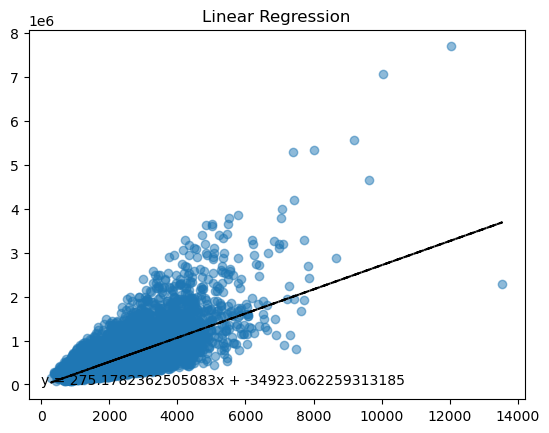

testing r2 0.493534056816148
Based on the r2 value. linregression would not be the best fitting algoritm.  Try OLS with a 2nd order


In [72]:
print ("r2 equals 1 if perfect fit. r2 equals 0 if no fit")
from scipy.stats import linregress

df=pd.read_csv('kc_house_data.csv')
print(df.columns)
housing_array=np.array(df)

createdate=housing_array[:,2]
price=housing_array[:,3]
bedrooms=housing_array[:,4]
bathrooms=housing_array[:,5]
sqft_living=housing_array[:,6]
sqft_lot=housing_array[:,7]
floors=housing_array[:,8]
waterfront=housing_array[:,9]
view=housing_array[:,10]
condition=housing_array[:,11]
grade=housing_array[:,12]
sqft_above=housing_array[:,13]
sqft_basement=housing_array[:,14]
yr_built=housing_array[:,15]
yr_renovated=housing_array[:,16]
zipcode=housing_array[:,17]
lat=housing_array[:,18]
long=housing_array[:,19]
sqft_living15=housing_array[:,20]
sqft_lot15=housing_array[:,21]
sqft=sqft_above+sqft_basement

def train_model(training_set):
    source=(training_set[:,13]+training_set[:,14]).astype(float)
    target=training_set[:,3].astype(float)
    slope, intercept, r_value, p_value, std_err = linregress(source,target)
    print("training r2",r_value**2)
    predicted_y = slope * source + intercept

    fig = plt.figure()
    plt.scatter(source,target, alpha=0.5)
    plt.plot(source, predicted_y, 'k--')
    plt.title("Linear Regression")
    plt.text(0.5, 0.5, 'y = ' + str(slope) + 'x + ' + str(intercept))
    plt.show()
    return slope, intercept
    
def test_model( testing_set):
        source=(testing_set[:,13]+testing_set[:,14]).astype(float)
        target=testing_set[:,3].astype(float)
        slope, intercept, r_value, p_value, std_err = linregress(source,target)
        print("testing r2",r_value**2)

def split_into_training_and_testing_sets(data_array):
    
    num_training = int(3/4 * data_array.shape[0])
    permuted_indices = np.random.permutation(data_array.shape[0])
    training_set=housing_array[permuted_indices[:num_training], :]
    testing_set=housing_array[permuted_indices[num_training:], :]
    return training_set, testing_set


training_set,testing_set=split_into_training_and_testing_sets(housing_array)
slope,intercept=train_model(training_set)   
test_model(testing_set)

print("Based on the r2 value. linregression would not be the best fitting algoritm.  Try OLS with a 2nd order")


In [55]:
data = """
| row | cust_id | policy_num | policy_start | policy_end | policy_order | days_on_policy |
| 1   | 1000    | 17         | 09/23/2013   | 11/05/2013 | 1            | 43             |
| 2   | 1200    | 13         | 08/26/2011   | 04/30/2019 | 1            | 2804           |
| 3   | 3400    | 13         | 08/31/2012   | 02/22/2015 | 1            | 905            |
| 4   | 5000    | 17         | 04/12/2014   | 07/28/2014 | 1            | 107            |
| 5   | 5000    | 13         | 07/28/2014   | 08/24/2016 | 2            | 758            |
| 6   | 5000    | 11         | 08/24/2016   | 10/20/2018 | 3            | 787            |
| 7   | 5000    | 13         | 10/20/2018   | 05/02/2019 | 4            | 194            |
| 8   | 7600    | 13         | 02/02/2015   | 05/03/2019 | 1            | 1551           |
| 9   | 4300    | 11         | 01/07/2015   | 05/04/2017 | 1            | 848            |
| 10  | 4300    | 13         | 05/04/2017   | 05/05/2019 | 2            | 731            |
| 11  | 9800    | 13         | 12/12/2001   | 10/06/2015 | 1            | 5046           |
| 12  | 9800    | 11         | 10/06/2015   | 05/06/2019 | 2            | 1308           |
"""

data = data.strip().split('\n')

data = [i.strip().split('|') for i in data]

data = [i[1:-1] for i in data]

columns=[data.strip() for data in data[0]]

df = pd.DataFrame(data[1:], columns=columns)
print(df.columns)
df.set_index(['row'],inplace=True)
# set the datatypes for each column
df['cust_id'] = df['cust_id'].astype(int)
df['policy_num'] = df['policy_num'].astype(int)
df['policy_start'] = pd.to_datetime(df['policy_start'])
df['policy_end'] = pd.to_datetime(df['policy_end'])
df['policy_order'] = df['policy_order'].astype(int)
df['days_on_policy'] = df['days_on_policy'].astype(int)
#print(df)

def create_filter(df, filter_cols, filter_values,operator_values):
    """
    create a filter for a dataframe
    """
    filter_list = []
    for col, val,operator in zip(filter_cols, filter_values,operator_values):
        if operator=='>':
            filter_list.append(df[col] > val)
        elif operator=='>=':
            filter_list.append(df[col] >= val)
        elif operator=='<':
            filter_list.append(df[col] < val)
        elif operator=='<=':
            filter_list.append(df[col] <= val)
        elif operator=='==':
            filter_list.append(df[col] == val)
    return pd.concat(filter_list, axis=1).all(axis=1)
#filter_cols=['days_on_policy']
#filter_values=[350]
#operator_values=['>']
#filter=create_filter(df, filter_cols, filter_values,operator_values)
#df=df[filter]

df = df.sort_values(by=['cust_id','policy_order'], ascending=False)
#print(df)

df_grouped = df.groupby('cust_id')
rolling_df=df_grouped.rolling(window=1).sum()
print(rolling_df)
prev_key,prev_policy_num,prev_days_on_policy=tuple(),"",""
prev_key=None
for key,item in rolling_df.iterrows():
    #print(type(key),type(prev_key))
    policy_num=item['policy_num']
    days_on_policy=item['days_on_policy']
    if prev_key!=None:
        prev_policy_num,prev_days_on_policy=rolling_df.loc[prev_key][['policy_num','days_on_policy']]
        if key[0]==prev_key[0] and policy_num==13 and prev_policy_num==11 and prev_days_on_policy>350 and days_on_policy>350:
            print(prev_key[0],prev_policy_num)
    prev_key=key
    #if prev_key!=None:
    #    print(prev_key[0],prev_policy)


Index(['row', 'cust_id', 'policy_num', 'policy_start', 'policy_end',
       'policy_order', 'days_on_policy'],
      dtype='object')
               policy_num  policy_order  days_on_policy
cust_id row                                            
1000     1           17.0           1.0            43.0
1200     2           13.0           1.0          2804.0
3400     3           13.0           1.0           905.0
4300     10          13.0           2.0           731.0
         9           11.0           1.0           848.0
5000     7           13.0           4.0           194.0
         6           11.0           3.0           787.0
         5           13.0           2.0           758.0
         4           17.0           1.0           107.0
7600     8           13.0           1.0          1551.0
9800     12          11.0           2.0          1308.0
         11          13.0           1.0          5046.0
5000 11.0
9800 11.0


In [68]:
txt="""id,data1
1,a
2,b
3,c
4,d
"""

from io import StringIO
f = StringIO(txt)
df1 = pd.read_table(f,sep =',')
print(df1.columns)
df1['id']=df1['id'].astype(int)
print(df1)


txt="""id1,id2,data2
1,2,e
1,3,f
1,4,g
2,3,h
2,4,i
3,4,j
"""

f = StringIO(txt)
df2 = pd.read_table(f,sep =',')
print(df2.columns)
df2['id1']=df2['id1'].astype(int)
df2['id2']=df2['id2'].astype(int)
print(df2)

left_on='id1'
right_on='id'
suffix='_1'
df2=df2.merge(df1, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

left_on='id2'
right_on='id'
suffix='_2'
df2=df2.merge(df1, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

print(df2)

Index(['id', 'data1'], dtype='object')
   id data1
0   1     a
1   2     b
2   3     c
3   4     d
Index(['id1', 'id2', 'data2'], dtype='object')
   id1  id2 data2
0    1    2     e
1    1    3     f
2    1    4     g
3    2    3     h
4    2    4     i
5    3    4     j
   id1  id2 data2  id data1  id_2 data1_2
0    1    2     e   1     a     2       b
1    1    3     f   1     a     3       c
2    1    4     g   1     a     4       d
3    2    3     h   2     b     3       c
4    2    4     i   2     b     4       d
5    3    4     j   3     c     4       d


In [69]:
content="""\\[-16pt]
x = 10
print ("hi")
\\
thinhline
\\[-16pt]
y = 3
print ("bye")
\\
thinhline
\\[-16pt]
z = 7
print ("zap")
\\
thinhline
This is random text.
"""

pattern = re.compile(r"""(\\\[-16pt]\n)    # Start. Don't technically need to capture.
                         (.*?)             # What we want. Must capture ;)
                         (\n\\\nthinhline) # End. Also don't really need to capture
                      """, re.X | re.DOTALL)

for m in pattern.finditer(content):
    print("Matched:\n----\n%s\n----\n" % m.group(2))

Matched:
----
x = 10
print ("hi")
----

Matched:
----
y = 3
print ("bye")
----

Matched:
----
z = 7
print ("zap")
----



In [74]:
#df=pd.read_csv('https://raw.githubusercontent.com/nbertagnolli/counsel-chat/master/data/20200325_counsel_chat.csv')
#df.to_csv('counsel_chat.csv')
pd.set_option('display.max_colwidth', -1)
df=pd.read_csv('counsel_chat.csv',nrows=10)
for item in df.iterrows():
    print(item)

(0, Unnamed: 0       0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
Unnamed: 0.1     

C:\Users\DNISHI~1.BOI\AppData\Local\Temp/ipykernel_14676/3365225464.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [75]:
print("Count the columns in a csv")
def count_columns(file_name):
    with open(file_name, 'r',encoding='iso-8859-1') as f:
        lines = f.readlines()
        return len(lines[0].split(','))


print(count_columns('counsel_chat.csv'))

Count the columns in a csv
13


In [34]:
import os

def wait_for_file(path, timeout=None):
    """
    Wait for a file to be created in a directory
    """
    start = time.time()
    while not os.path.exists(path):
        if timeout and time.time() - start > timeout:
            raise TimeoutError("Timed out waiting for file")
        time.sleep(0.1)
    return path

path= 'C:\\Users\\dnishimoto.BOISE'  

wait_for_file(path,10000)

'C:\\Users\\dnishimoto.BOISE'

(73, 2)


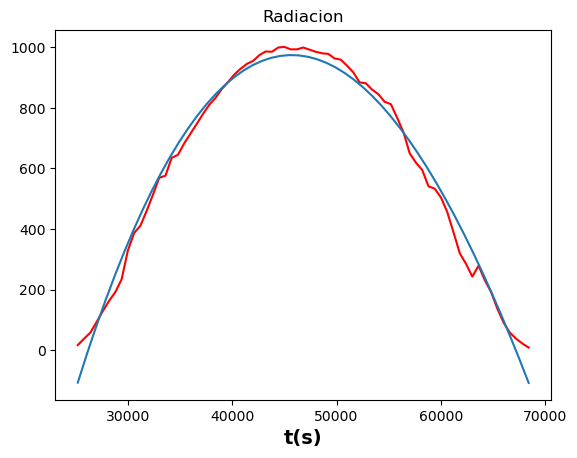

In [4]:
data = np.array([[25200, 17],
                 [25800, 38],
                 [26400, 58],
                 [27000, 93],
                 [27600, 129],
                 [28200, 163],
                 [28800, 192],
                 [29400, 234],
                 [30000, 329],
                 [30600, 387],
                 [31200, 411],
                 [31800, 460],
                 [32400, 513],
                 [33000, 569],
                 [33600, 576],
                 [34200, 635],
                 [34800, 645],
                 [35400, 683],
                 [36000, 715],
                 [36600, 747],
                 [37200, 780],
                 [37800, 810],
                 [38400, 833],
                 [39000, 862],
                 [39600, 885],
                 [40200, 910],
                 [40800, 929],
                 [41400, 945],
                 [42000, 955],
                 [42600, 974],
                 [43200, 986],
                 [43800, 985],
                 [44400, 999],
                 [45000, 1001],
                 [45600, 993],
                 [46200, 993],
                 [46800, 999],
                 [47400, 992],
                 [48000, 985],
                 [48600, 980],
                 [49200, 978],
                 [49800, 963],
                 [50400, 959],
                 [51000, 939],
                 [51600, 917],
                 [52200, 884],
                 [52800, 881],
                 [53400, 860],
                 [54000, 845],
                 [54600, 820],
                 [55200, 812],
                 [55800, 767],
                 [56400, 720],
                 [57000, 650],
                 [57600, 619],
                 [58200, 595],
                 [58800, 541],
                 [59400, 533],
                 [60000, 504],
                 [60600, 456],
                 [61200, 389],
                 [61800, 320],
                 [62400, 285],
                 [63000, 243],
                 [63600, 279],
                 [64200, 231],
                 [64800, 192],
                 [65400, 137],
                 [66000, 91],
                 [66600, 58],
                 [67200, 38],
                 [67800, 22],
                 [68400, 9]])

print(data.shape)

X=data[:, 0].reshape(-1,1)
y=data[:, 1]

min_X=min(X)
max_X=max(X)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

X_new = np.linspace(min_X,max_X).reshape(-1, 1)
X_new_poly = poly.transform(X_new)

linreg = LinearRegression().fit(X_poly, y)
y_new = linreg.predict(X_new_poly)

plt.plot(X,y,'r')
plt.plot(X_new, y_new)
plt.xlabel('t(s)',fontsize=14,fontweight='bold')
plt.title('Radiacion')
plt.show()

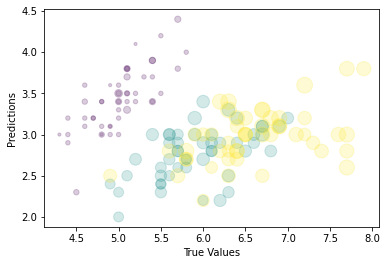

In [78]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

mlp = MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=1000)

history=mlp.fit(X_train, y_train)

pipe = Pipeline([('scaler', StandardScaler()), ('mlp', mlp)])
history=pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')

#plt.scatter(X_test[0],X_test[1],alpha=0.2,s=10*X_test[3])
#plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


In [79]:
def decorator_function(original_function):
    def wrapper_function(*args, **kwargs):
        print(args,[v for k,v in kwargs.items()])
        return f" do your thing with the original string data {original_function(*args, **kwargs)}!!!"
    return wrapper_function

@decorator_function
def display():
    return "Hello"

@decorator_function
def display_info(name, age):
    return f"{name} is {age} years old"

print(display())
print(display_info("John", 25))

() []
 do your thing with the original string data Hello!!!
('John', 25) []
 do your thing with the original string data John is 25 years old!!!


In [80]:

abc = ['foo', 'bar']
df =pd.DataFrame({'A':[12,23],'B':[np.nan,np.nan]})
df.loc[1,'B']=''
df.at[1,'B']=abc
print(df)

    A           B
0  12  NaN       
1  23  [foo, bar]


In [81]:
from urllib.request import urlretrieve,Request,urlopen
import requests
from bs4 import BeautifulSoup


def extract_table_rows(table):
    """
    extract table rows from table
    """
    rows = table.find_all('tr')
    return rows

def extract_table_data(rows):
    """
    extract table data from rows
    """
    data = []
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols if ele])
    return data

def extract_table(html_content):
    """
    extract table from html content
    """
    soup = BeautifulSoup(html_content, 'html.parser')
    table = soup.find_all('table')
    return table

url="http://accessiblehtml.sourceforge.net/html_tables_cookbook.html"
html = urlopen(url).read()

#print(html)
tables=extract_table(html)

for table in tables:
    rows=extract_table_rows(table)
    for row in rows:
        data=extract_table_data(rows) 
        for cell_data in data:
            print(cell_data)
#print(tables)


['Licensed under \nCreative Commons Attribution 3.0 Unported License', 'Stephen R. Ferg  2003-02-06', "For the best results when printing this page,set your browser's font size to SMALLEST."]
[]
['1 Introduction']
['2 Terms Used in this Document']
['2.1 Empty Cell']
['2.2 Regular Table']
['2.3 Irregular Table']
['2.4 Internal identifiers']
['3 Rules for HTML Tables']
['3.1 Rules for Regular Tables']
['3.2 Rules for Irregular Tables']
['4 Some Example Tables']
['4.1 Example Table 1a']
['4.2 Example Table 1b']
['4.3 Example Table 1c']
['5 Rules for Footnotes']
['5.1 Base Footnote ID']
['5.2 Presentation Footnote ID']
['5.3 Two Different Roles for Presentation Footnote IDs - as Footnote References and Footnote Targets']
['5.4 Footnote References']
['5.5 Footnote Targets']
['5.6 Endnotes']
['5.7 Example Table 2']
['6 Rules for Nested Row Headers']
['6.1 Example Table 3']
['7 Rules for Visual Separator Rows']
['8 Rules for Greenbar']
['8.1 Example Table 4']
[]
['1 Introduction']
['2 Terms U

In [82]:
my_string = Template('Data science has been called $identifier')
print(my_string.substitute(identifier='sexiest job of the 21st century'))

NameError: name 'Template' is not defined

In [ ]:
import threading
import time
import math


primes=[]

def is_prime(n):
    if n % 2 == 0 and n > 2:
        return False
    for i in range(3, int(math.sqrt(n)) + 1, 2):
        if n % i == 0:
            return False
    return True

def prime_numbers(event):
    n=0

    while True:
        if event.is_set():
            break
        #print("prime:",n)
        if is_prime(n):
            primes.append(n)
        n+=1
        time.sleep(.0000001)


def report(event):

    while True:
        if event.is_set():
            break
        print(f"Primes found {len(primes)}")
            
        time.sleep(1)

if __name__ == '__main__':
    event = threading.Event()
    t1 = threading.Thread(target=prime_numbers, args=(event,))
    t2 = threading.Thread(target=report, args=(event,))
    t1.start()
    t2.start()
    #run processes for 10 seconds
    time.sleep(10)
    #set the flag that stops the threads
    event.set()
    print("event set?", event.is_set())
    print("Event is set to true. Now threads can be released.")  

In [83]:
my_date = "Today is 23rd May 2019. Tomorrow is 24th May 19."

re.findall(r"(\d+)(?:th|rd)",my_date)

['23', '24']

In [84]:
print("find strings with one to three dashes and numbers")
texts = ['1-2-3-4-5','123-4567-8901','123-45-67-890','123-456728901','1234567890123','123--67890123','-234567890123','123456789012-','-23456789012-']

for text in texts:
    result=re.findall(r"^\d+-?\d+-?\d+-?\d+$",text)
    phone=re.sub('-','',str(result))
    print(text,result,phone)



find strings with one to three dashes and numbers
1-2-3-4-5 [] []
123-4567-8901 ['123-4567-8901'] ['12345678901']
123-45-67-890 ['123-45-67-890'] ['1234567890']
123-456728901 ['123-456728901'] ['123456728901']
1234567890123 ['1234567890123'] ['1234567890123']
123--67890123 [] []
-234567890123 [] []
123456789012- [] []
-23456789012- [] []


In [85]:
text="Python 3.0 was released on 12-03-2008."

information = re.search('(\d{1,2})-(\d{2})-(\d{4})',text)
print(information.group(0))
print(information.group(1))
print(information.group(2))
print(information.group(3))

12-03-2008
12
03
2008


In [86]:

sentence="I wish you a happy happy birthday!"

print(re.findall(r"(\w+)\s\1",sentence))
print(re.sub(r"(\w+)\s\1",r"\1",sentence))

['happy']
I wish you a happy birthday!


In [87]:
sentence = "Your new code number is 23434. Please, enter 23434 to open the door."

print(re.findall(r"(?P<code>\d{5}).*?(?P=code)",sentence))



['23434']


In [109]:
def find_repeating_numbers(string):
    """
    find repeating numbers in a string of numbers
    :param string: string of numbers
    :return: list of repeating numbers
    """
    # create a list of numbers
    numbers = [int(x) for x in string]
    # create a list of repeating numbers
    repeating_numbers = []
    # iterate through the list of numbers
    for i in range(len(numbers)):
        # if the number is already in the list of repeating numbers, continue
        if numbers[i] in repeating_numbers:
            continue
        # if the number is not in the list of repeating numbers, check if it is repeated
        else:
            # if the number is repeated, add it to the list of repeating numbers
            if numbers.count(numbers[i]) > 1:
                repeating_numbers.append(numbers[i])
    # return the list of repeating numbers
    return repeating_numbers

data=[
0.14285714285714285 
,0.1444444444444444  
,0.3333333333333333  
,0.1428824114288241  
,0.1288241128824112  
,0.12128824112882411 
,0.1231231231231231  
,0.101010101010101   
,0.12300123123123123 
,0.4254250042542542  
,0.1232435213443346  
]

# print the list of repeating numbers
#print(find_repeating_numbers('14285714285714285'))
for item in data:
    item=re.sub('0.','',str(item))
    result=find_repeating_numbers(item)
    repeating_number=''.join([str(n) for n in result])
    print(item,repeating_number)

14285714285714285 142857
1444444444444444 4
3333333333333333 3
1428824114288241 1428
1288241128824112 1284
12128824112882411 1284
1231231231231231 123
1 
123123123123123 123
42542542542542 425
1232435213443346 1234


In [121]:
string="@marykatherine_q i know! I heard it this morning and wondered the same thing. Moscooooooow is so behind the times"
regex_elongated = r"\w*(.)\1\w*"
print(re.search(regex_elongated,string))

<re.Match object; span=(78, 90), match='Moscooooooow'>


In [125]:
print("Look ahead")
my_text="tweets.txt transferred, mypass.txt transferred, keywords.txt error"
print(re.findall(r"\w+\.txt(?=\stransferred)",my_text))
print(re.findall(r"\w+\.txt(?!\stransferred)",my_text))

['tweets.txt', 'mypass.txt']
['keywords.txt']


In [130]:
print("Look behind")
my_text="Member: Angus Young, Member: Chris Slade, Past: Malcolm Young, Past: Cliff Williams."
print(re.findall(r"(?<=Member:\s)\w+\s\w+",my_text))

print("look behind for Member: and word and space and word.  Repeat this pattern more than once")


Look behind
['Angus Young', 'Chris Slade']
look behind for Member: and word and space and word.  Repeat this pattern more than once


In [9]:
print("Get the words followed by the word python")

string="You need excellent python skills to be a data scientist. Must be! Excellent python"
print(re.findall(r"\w+\s(?=python)+",string))

Get the words followed by the word python
['excellent ', 'Excellent ']


In [33]:
import re

string = "Rank 0: JADA and JOSIAH\n    Rank 1: Emily and ETHAN\n    Rank 2: Ava and David\n    Rank 3: SERENITY and Jayden\n    Rank 4: Claire and MASON\n    Rank 5: SOPHIA and RYAN\n    Rank 6: Sarah and CHRISTIAN\n    Rank 7: ASHLEY and ISAIAH\n    Rank 8: CHAYA and JAYDEN\n    Rank 9: ABIGAIL and Michael\n    Rank 10: Zoe and NOAH\n    Rank 11: LEAH and SAMUEL\n    Rank 12: HAILEY and SEBASTIAN\n    Rank 13: AVA and Noah\n    Rank 14: Olivia and Dylan\n    Rank 15: EMMA and LUCAS\n    Rank 16: CHLOE and JOSHUA\n    Rank 17: Sophia and ANGEL\n    Rank 18: AALIYAH and Jacob\n    Rank 19: Angela and Matthew\n    Rank 20: Camila and Josiah\n    Rank 21: Savannah and JACOB\n    Rank 22: Serenity and Muhammad\n    Rank 23: Chloe and ALEXANDER\n    Rank 24: Fatoumata and Jason\n    Rank 25: ISABELLA and Ethan\n    Rank 26: MIA and DANIEL\n    Rank 27: FIONA and Joseph\n    Rank 28: Skylar and AIDEN\n    Rank 29: Ashley and Moshe\n    Rank 30: Rachel and Jeremiah\n    Rank 31: Sofia and William\n    Rank 32: Alina and Alexander\n    Rank 33: MADISON and Sebastian\n    Rank 34: RACHEL and ERIC\n    Rank 35: CAMILA and MOSHE\n    Rank 36: CHANA and Jack\n    Rank 37: TAYLOR and Eric\n    Rank 38: Kayla and MUHAMMAD\n    Rank 39: Miriam and Lucas\n    Rank 40: Leah and BENJAMIN\n    Rank 41: Grace and Aiden\n    Rank 42: ANGELA and Ryan\n    Rank 43: Isabella and Liam\n    Rank 44: Emma and JASON\n    Rank 45: KAYLA and KEVIN\n    Rank 46: SOFIA and Elijah\n    Rank 47: Madison and Angel\n    Rank 48: Aaliyah and JAMES\n    Rank 49: Taylor and Daniel\n    Rank 50: GENESIS and Samuel\n    Rank 51: Esther and Amir\n    Rank 52: MAKAYLA and Mason\n    Rank 53: Victoria and Joshua\n    Rank 54: Chaya and ANTHONY\n    Rank 55: Brielle and JOSEPH\n    Rank 56: Anna and Benjamin\n    Rank 57: Samantha and JUSTIN\n    Rank 58: ESTHER and JEREMIAH\n    Rank 59: GRACE and MATTHEW\n    Rank 60: Mariam and Carter\n    Rank 61: Mia and James\n    Rank 62: NEVAEH and TYLER\n    Rank 63: GABRIELLE and DAVID\n    Rank 64: EMILY and JACK\n    Rank 65: London and ELIJAH\n    Rank 66: TIFFANY and MICHAEL\n    Rank 67: Chana and CHRISTOPHER"

#a
#print(re.findall(r'(?<=Rank\s)(\d+)[:\s]+(\w+)\sand\s(\w+).*', string))
df = pd.DataFrame(re.findall(r'(?<=Rank\s)(\d+)[:\s]+(\w+)\sand\s(\w+).*', string),columns=['Rank','Girl_Name','Boy_Name'])

df['Girl_Name']=df['Girl_Name'].apply(lambda x: x.lower())
df['Boy_Name']=df['Boy_Name'].apply(lambda x: x.lower())
grouped=df.groupby(['Girl_Name']).size().sort_values(ascending=False)
print("\nGirl Names\n")
for index,item in grouped.items():
    print(index,item)
    
grouped=df.groupby(['Boy_Name']).size().sort_values(ascending=False)
print("\nBoy Names\n")
for index,item in grouped.items():
    print(index,item)    


Girl Names

aaliyah 2
sophia 2
madison 2
rachel 2
leah 2
kayla 2
isabella 2
grace 2
serenity 2
sofia 2
emma 2
emily 2
esther 2
chloe 2
taylor 2
angela 2
ashley 2
chaya 2
ava 2
camila 2
chana 2
mia 2
savannah 1
sarah 1
skylar 1
samantha 1
tiffany 1
miriam 1
victoria 1
olivia 1
nevaeh 1
jada 1
mariam 1
makayla 1
london 1
abigail 1
hailey 1
genesis 1
gabrielle 1
fiona 1
fatoumata 1
claire 1
brielle 1
anna 1
alina 1
zoe 1

Boy Names

aiden 2
james 2
alexander 2
jeremiah 2
joseph 2
joshua 2
josiah 2
lucas 2
mason 2
matthew 2
michael 2
moshe 2
muhammad 2
noah 2
ryan 2
samuel 2
sebastian 2
jason 2
jayden 2
jacob 2
jack 2
angel 2
benjamin 2
daniel 2
david 2
elijah 2
eric 2
ethan 2
justin 1
kevin 1
liam 1
dylan 1
christopher 1
christian 1
carter 1
anthony 1
isaiah 1
amir 1
tyler 1
william 1


In [39]:
set_a = set(['a','b','c','a'])
print(set_a)

# b.
set_a.update(['d'])
print(set_a)
set_a.discard('a')
print(set_a)

{'b', 'a', 'c'}
{'d', 'b', 'a', 'c'}
{'d', 'b', 'c'}


In [42]:
my_set=set()
for i in [{'1'}, {'2','8'}, {'3','9'}]:
    my_set=my_set.union(i)
    
print(my_set)
    

{'1', '3', '8', '9', '2'}


In [25]:


list=[("1 this is sentence 1","1 this is sentence 2",1),("2 this is sentence 1","2 this is sentence 2",2),("3 this is sentence 1","3 this is sentence 2",3)]
numbers=map(lambda x: x[2],list)
result=reduce(lambda x,y: x+y,numbers)
print(result)

6


In [29]:
dictionary = {
     '4123bf9f': {'date': '', 'link': '', 'topic': ''},
     '45361a6c': {'date': '', 'link': '', 'topic': ''},
     '4d521c71': {'date': '', 'link': '', 'topic': ''},
     '5b00c155': {'date': '', 'link': '', 'topic': ''},
     '875737f4': {'date': '', 'link': '', 'topic': ''},
     '90a64c61': {'date': '', 'link': '', 'topic': ''}
}
topics = ['1', '2', '3', '4', '5 ', '6']
topic=iter(topics)
for key in dictionary.keys():
    dictionary[key]['topic']=next(topic)

print(dictionary)

{'4123bf9f': {'date': '', 'link': '', 'topic': '1'}, '45361a6c': {'date': '', 'link': '', 'topic': '2'}, '4d521c71': {'date': '', 'link': '', 'topic': '3'}, '5b00c155': {'date': '', 'link': '', 'topic': '4'}, '875737f4': {'date': '', 'link': '', 'topic': '5 '}, '90a64c61': {'date': '', 'link': '', 'topic': '6'}}


In [73]:
def ReduceToDictionary(tuples):
    dict={}
    for item in tuples:
        key = item[0]
        value = item[1]
        if key in dict:
            dict[key] += float(value)
        else:
            dict[key] = float(value)
    return dict

def BuildList(dates,dict):
    result_values=[]
    for date in dates:
        if date in dict:
            val=dict[date]
            result_values.append(val)
        else:
            val=0
            result_values.append(val)
    return result_values
def StrToDate(string):
    groups=re.match('(\d{1,2})[/](\d{4})',string)
    year=int(groups[2])
    month=int(groups[1])
    return(datetime.datetime(year,1,month))
        
dates1 = ['1/2021', '1/2021', '12/2020']
values1 = ['-2500', '-150', '-10000']

dates2 = ['2/2021', '3/2021', '1/2021']
values2 = ['3000', '1000', '3000']

tuple1=[(StrToDate(dates1[i]),values1[i]) for i in range(len(dates1))]
tuple2=[(StrToDate(dates2[i]),values2[i]) for i in range(len(dates2))]

dates=sorted(set(list(map(StrToDate,dates1))+list(map(StrToDate,dates2))))

dict1=ReduceToDictionary(tuple1)
dict2=ReduceToDictionary(tuple2)


#var dates = ['12/2020', '1/2021', '2/2021', '3/2021'];
#var values1 = ['-10000', '-2650', '0', '0'];
#var values2 = ['0', '3000', '3000', '1000'];
result_values1=BuildList(dates,dict1)
result_values2=BuildList(dates,dict2)

date_string=[date.strftime("%Y/%m") for date in dates]
print(date_string)
print(result_values1)    
print(result_values2)    



['2020/01', '2021/01', '2021/01', '2021/01']
[-10000.0, -2650.0, 0, 0]
[0, 3000.0, 3000.0, 1000.0]


In [33]:
from datetime import datetime

var1='1/2021'
groups=re.match('(\d{1,2})[/](\d{4})',var1)
year=int(groups[2])
month=int(groups[1])
print(datetime(year,month,1))
#a_date=date(groups(0),groups(1))
#print(a_date)


2021-01-01 00:00:00


dictionary keys can not be a datetime type


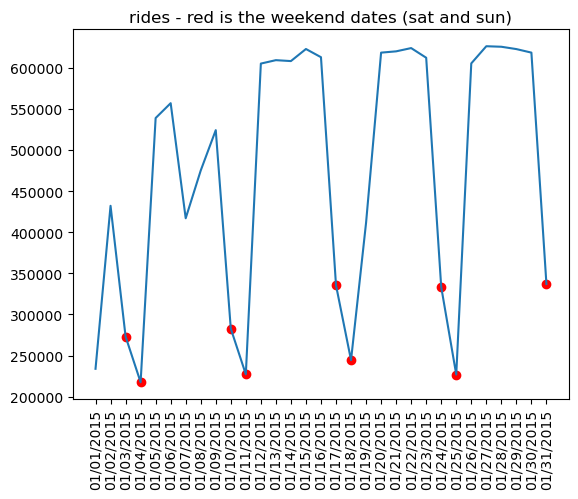

Rides decrease during the weekend


In [61]:
import matplotlib.pyplot as plt
from datetime import datetime
from collections import OrderedDict

def weekend(dates):
    weekend_dates = []
    for date in dates:
        if date.weekday() == 5 or date.weekday() == 6:
            weekend_dates.append(date)
    return weekend_dates

data=[('01/01/2015', 233956), ('01/02/2015', 432144), ('01/03/2015', 273207), ('01/04/2015', 217632), ('01/05/2015', 538868), ('01/06/2015', 556918), ('01/07/2015', 416984), ('01/08/2015', 475074), ('01/09/2015', 524144), ('01/10/2015', 282850), ('01/11/2015', 227240), ('01/12/2015', 605068), ('01/13/2015', 609226), ('01/14/2015', 608109), ('01/15/2015', 622792), ('01/16/2015', 612833), ('01/17/2015', 335555), ('01/18/2015', 244490), ('01/19/2015', 411497), ('01/20/2015', 618377), ('01/21/2015', 619945), ('01/22/2015', 623914), ('01/23/2015', 612177), ('01/24/2015', 333440), ('01/25/2015', 226964), ('01/26/2015', 605287), ('01/27/2015', 626168), ('01/28/2015', 625531), ('01/29/2015', 622695), ('01/30/2015', 618395), ('01/31/2015', 337018)]
dates=[datetime.strptime(row[0], '%m/%d/%Y') for row in data]
weekend_dates=weekend(dates)

dict_weekend=OrderedDict()

print("dictionary keys can not be a datetime type")
for date,value in data:
    if datetime.strptime(date, '%m/%d/%Y') in weekend_dates:
        if date not in dict_weekend:
            dict_weekend[date] = value
        else:
            dict_weekend[date] +=value
    
#print(weekend_dates)

x = [row[0] for row in data]
y = [row[1] for row in data]

plt.title('rides - red is the weekend dates (sat and sun)')
plt.plot(x,y)
plt.scatter(dict_weekend.keys(),dict_weekend.values(),c='r')
plt.xticks(rotation=90)
plt.show()

#plt.xticks(rotation=90)
#plt.show()
print('Rides decrease during the weekend')

In [3]:
from collections import namedtuple
Mascot=namedtuple('Mascot',['mascot_name','species','school_name','number_of_votes'])

list_of_mascots = [Mascot(mascot_name='Peter', species='Anteater', school_name='UC Irvine', number_of_votes=137988),
Mascot(mascot_name='Victor E.', species='Bulldog', school_name='Fresno State', number_of_votes=118302),
 Mascot(mascot_name='Tuffy the Titan', species='Elephant', school_name='Cal State Fullerton', number_of_votes=94413)]

for i in range(len(list_of_mascots)):
        #print(list_of_mascots[i].number_of_votes)
        list_of_mascots[i]=list_of_mascots[i]._replace(number_of_votes = 9)

print(list_of_mascots)

[Mascot(mascot_name='Peter', species='Anteater', school_name='UC Irvine', number_of_votes=9), Mascot(mascot_name='Victor E.', species='Bulldog', school_name='Fresno State', number_of_votes=9), Mascot(mascot_name='Tuffy the Titan', species='Elephant', school_name='Cal State Fullerton', number_of_votes=9)]


In [4]:
print("Converted a dictionary to a list of named tuples")
d = {'a': 1, 'b': 2, 'c': 3, 'd': 4}

def dict_to_namedtuple(d):
    return namedtuple('GenericDict', d.keys())(**d)

result=dict_to_namedtuple(d)
print(result)

Converted a dictionary to a list of named tuples
GenericDict(a=1, b=2, c=3, d=4)


In [84]:
print("Converting a dataframe to a list of named tuples")
LanguageRecord=namedtuple('Generic',['id','name','creation_date'])

def map_to_language_record(row):
    return LanguageRecord(row.id, row.name, row.creation_date)

df=pd.DataFrame({'id':[1,2,3],'name':['bob','dick','jane'],'creation_date':['1/1/2021','1/2/2021','1/3/2021']})

languages = list(map(map_to_language_record, df.itertuples()))
print(languages)

[Generic(id=1, name='bob', creation_date='1/1/2021'), Generic(id=2, name='dick', creation_date='1/2/2021'), Generic(id=3, name='jane', creation_date='1/3/2021')]


In [30]:
print("convert boise time zone to pacific time zone")
from pytz import timezone
from datetime import datetime

def convert_time(utc_time, time_zone):
    return utc_time.astimezone(timezone(time_zone))

local_time=datetime.now()
mst_tz=timezone('America/Boise')

mst_dt=local_time.replace(tzinfo=mst_tz)
pcf_dt=convert_time(mst_dt,"US/Pacific")
print(mst_dt,pcf_dt)


convert boise time zone to pacific time zone
2021-10-13 08:49:54.059717-07:45 2021-10-13 09:34:54.059717-07:00


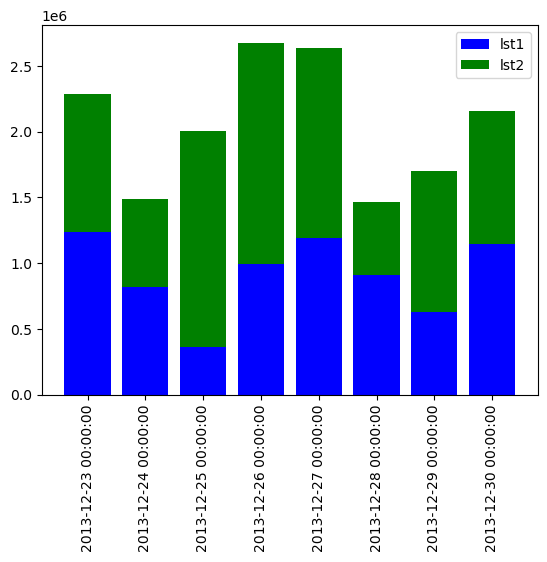

In [2]:
lst1=[('2013-12-23 00:00:00', 1236510),
('2013-12-24 00:00:00', 815873) ,
('2013-12-25 00:00:00', 363078) ,
('2013-12-26 00:00:00', 995622) ,
('2013-12-27 00:00:00', 1191650),
('2013-12-28 00:00:00', 911223) ,
('2013-12-29 00:00:00', 627779) ,
('2013-12-30 00:00:00', 1142767)
 ]

lst2=[('2013-11-23 00:00:00', 1048943),
('2013-11-24 00:00:00', 674817) ,
('2013-11-25 00:00:00', 1641025),
('2013-11-26 00:00:00', 1681213),
('2013-11-27 00:00:00', 1441786),
('2013-11-28 00:00:00', 554312),
('2013-11-29 00:00:00', 1074544),
('2013-11-30 00:00:00', 1013178)]

def compare_lists(lst1, lst2):
    """
    This function takes two lists as input and returns a stacked barplot graph
    """
    # create a list of x-axis values
    x1 =[date for date,value in lst1]
    #x2 =[date for date,value in lst2]
    # create a list of y-axis values
    y1 = [value for date,value in lst1]
    y2 = [value for date,value in lst2]
    # create a stacked barplot graph
    fig, ax = plt.subplots()
    ax.bar(x1, y1, color='b', label='lst1')
    ax.bar(x1, y2, color='g', label='lst2', bottom=y1)
    plt.legend(loc='upper right')
    plt.xticks(rotation=90)
    plt.show()

compare_lists(lst1, lst2)

In [68]:
print('group words together by word length')

text = "May your hot chocolate be delicious and sweet and your Monday be short"

max_len=0
for word in text.split():
    if len(word)>max_len: 
        max_len=len(word) 
print(max_len)        
pattern=[]

for index in range(1,max_len+1):
    index=str(index)
    pattern.append(r"(\b\w{"+"{index}".format(index=index)+r"}\b\s+)*")

pattern=''.join(pattern)
print(pattern)
groups=re.findall(pattern,text)
dict = defaultdict(set)
for group in groups:
    for position,value in enumerate(group):
        #print(position+1,value)
        if len(value)>0:
            dict[position+1].add(value)

print(dict)  
 
#for group in groups:
#    print(group)

#dict=defaultdict(set)

#for word in text.split():
#    dict[len(word)].add(word)

#results={}
#for k, v in dict.items():    
#    results[k]=list(v)

#print(results)

group words together by word length
9
(\b\w{1}\b\s+)*(\b\w{2}\b\s+)*(\b\w{3}\b\s+)*(\b\w{4}\b\s+)*(\b\w{5}\b\s+)*(\b\w{6}\b\s+)*(\b\w{7}\b\s+)*(\b\w{8}\b\s+)*(\b\w{9}\b\s+)*
defaultdict(<class 'set'>, {3: {'May ', 'hot ', 'and '}, 4: {'your '}, 9: {'delicious ', 'chocolate '}, 2: {'be '}, 5: {'sweet '}, 6: {'Monday '}})


In [69]:
df = pd.DataFrame({'strings':['1','$500','333','2','(8','?8','5','1','444']})

def zero_pad(x):
    if x.isdigit():
        return x.zfill(3)
    else:
        return x
    
df['strings']=df['strings'].map(zero_pad)
print(df)

  strings
0     001
1    $500
2     333
3     002
4      (8
5      ?8
6     005
7     001
8     444


In [28]:
data_x = np.array([
    [0.885, 0.330, 9.100],
    [0.725, 0.390, 10.900],
    [0.560, 0.500, 9.400],
    [0.735, 0.570, 9.800],
    [0.610, 0.630, 8.400],
    [0.260, 0.630, 11.800],
    [0.500, 0.680, 10.500],
    [0.320, 0.780, 10.000]])
data_y = np.array([4.000, 5.000, 6.000, 5.000, 3.000, 8.000, 7.000, 6.000])

data=np.concatenate((data_x,data_y[:,None]),axis=1)

#print(data[:,0:3])
#print(data[:,3])
correlation = np.corrcoef(data[:,0], data[:,3],rowvar=False)[0,1]
#[-1, :-1]

print(correlation)

from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(data_x, data_y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in 
forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(data_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], 
    importances[indices[f]]))

0.4062028400272185
Feature ranking:
1. feature 0 (0.339678)
2. feature 2 (0.334904)
3. feature 1 (0.325418)


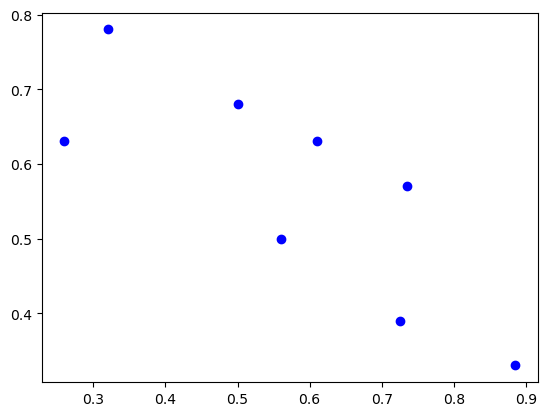

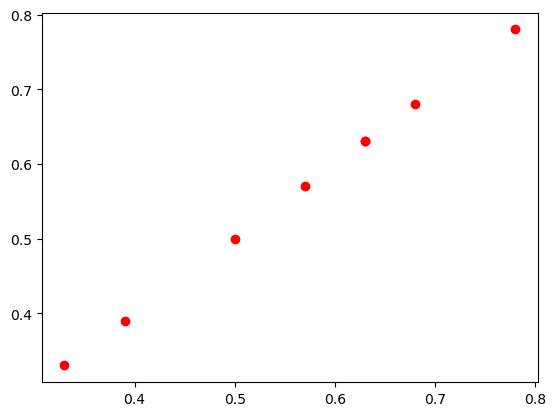

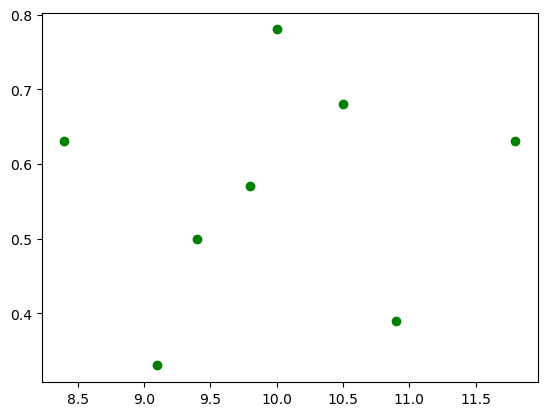

In [132]:
def combine_data(data_x, data_y):
    data_dict = {}
    for i in range(len(data_x)):
        data_dict[i] = [data_x[i], data_y[i]]
    return data_dict

def sort_data(data_dict):
    sorted_data = sorted(data_dict.items(), key=lambda x: x[1][1])
    return sorted_data


data_x = np.array([
    [0.885, 0.330, 9.100],
    [0.725, 0.390, 10.900],
    [0.560, 0.500, 9.400],
    [0.735, 0.570, 9.800],
    [0.610, 0.630, 8.400],
    [0.260, 0.630, 11.800],
    [0.500, 0.680, 10.500],
    [0.320, 0.780, 10.000]])
data_y = np.array([4.000, 5.000, 6.000, 5.000, 3.000, 8.000, 7.000, 6.000])

data_dict = combine_data(data_x, data_y)
sorted_data = sort_data(data_dict)

#print(sorted_data[0][1][0][2])

for i in range(len(sorted_data)):
    plt.scatter(sorted_data[i][1][0][0], sorted_data[i][1][0][1], c='b')
plt.show()
for i in range(len(sorted_data)):        
    plt.scatter(sorted_data[i][1][0][1], sorted_data[i][1][0][1], c='r')
plt.show()
for i in range(len(sorted_data)):        
    plt.scatter(sorted_data[i][1][0][2], sorted_data[i][1][0][1], c='g')
plt.show()

    
#print(sorted_data[:,0])
#plt.scatter(sorted_data)
#plt.scatter(data[:,1],data[:,3])
#plt.scatter(data[:,2],data[:,3])


In [26]:
lst = ['ds_a.cola','ds_a.colb','ds_b.cola','ds_b.colb']
pattern=r"(?:\bds_a\.\w+\b\s*)*(?:\bds_b\.\w+\b\s*)*"
string=" ".join(lst)

print(string)
groups=re.findall(pattern,string)
dict=defaultdict(set)
for group in groups:
    for item in group.split():
        if item !="":
            print(item)
            key,*value=item.split('.')
            dict[key].add(value[0])
    
print(dict)

ds_a.cola ds_a.colb ds_b.cola ds_b.colb
ds_a.cola
ds_a.colb
ds_b.cola
ds_b.colb
defaultdict(<class 'set'>, {'ds_a': {'cola', 'colb'}, 'ds_b': {'cola', 'colb'}})


Hello World2
reached dsn


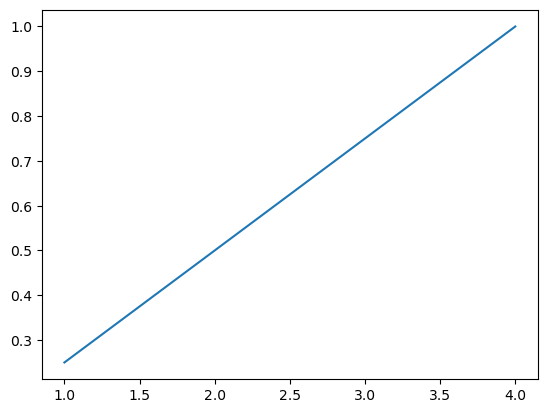

In [3]:
import python_fncs as fnc
import matplotlib.pyplot as plt
#import python_fncs.ecdf as dist

fnc.hello_world_fnc()

#help(helloworld)

fnc.test_fnc2()
x=[1,2,3,4]
x,y=fnc.ecdf(x)
plt.plot(x,y)
plt.show()


In [9]:
from keras.utils.vis_utils import plot_model
import python_fncs as fnc

data="If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social context in which a person lives is a big influence in self-esteem.Otherwise, you can go round and round trying to understand why you're not worthless, then go back to the same crowd and be knocked down again.There are many inspirational messages you can find in social media."
sentences=data.split(".")
#sentences=["Mary had a little lamb","Hello world"]
input_texts=[]
for sentence in sentences:
    words=fnc.clean(sentence,"input")
    input_texts+= [' '.join(words)]
    
input_max_len, input_voc_size, input_padded_data=fnc.pad_sentences(input_texts)

#print(input_padded_data)

target="Can I change my feeling of being worthless to everyone"

sentences=target.split(".")
target_texts=[]
for sentence in sentences:
    words=fnc.clean("sos "+sentence+" eos","input")
    target_texts+= [' '.join(words)]

target_max_len, target_voc_size, target_input_data=fnc.pad_sentences(target_texts)

#print(target_texts,target_padded_data)

summerizer=fnc.TextSummerizer(500,500,input_max_len,input_voc_size,target_max_len,target_voc_size)

model=summerizer.getModel()

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#remove eos
target_input_data2=target_input_data[:,:-1]
decoder_target_data=target_input_data.reshape(len(target_input_data),target_max_len,1)[:,1:]

history=model.fit([input_padded_data ,target_input_data2], decoder_target_data ,
                  epochs=3,
                  batch_size=512
                 )


ValueError: Data cardinality is ambiguous:
  x sizes: 5, 1
  y sizes: 1
Please provide data which shares the same first dimension.